# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account 
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer" 
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents 
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [1]:
# This will help in making the Python code more structured automatically
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns and rows to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading the dataset

In [3]:
churn = pd.read_csv("BankChurners.csv")
churn.head(10)  # View first 10 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


<IPython.core.display.Javascript object>

- Dependent variable is Attrition_Flag

## Data Overview

- Observations
- Sanity checks

In [4]:
# Checking the number of rows and columns in the training data
churn.shape

(10127, 21)

<IPython.core.display.Javascript object>

In [5]:
# check the data types of the columns in the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

<IPython.core.display.Javascript object>

In [6]:
# view the statistical summary of the numerical columns in the data
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


<IPython.core.display.Javascript object>

In [7]:
# check for missing values in the data
churn.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# check for duplicate values in the data
churn.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [9]:
print(churn.columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


<IPython.core.display.Javascript object>

In [10]:
catCols = []

for cols in churn.columns:
    if churn[cols].dtype == "object":
        catCols.append(cols)

<IPython.core.display.Javascript object>

In [11]:
# Check unique value counts
for cols in catCols:
    print(f"Value Counts for {cols}")
    print(churn[cols].value_counts())
    print("*" * 50)

Value Counts for Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
**************************************************
Value Counts for Gender
F    5358
M    4769
Name: Gender, dtype: int64
**************************************************
Value Counts for Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
**************************************************
Value Counts for Marital_Status
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
**************************************************
Value Counts for Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
**************************************************
Value Counts for Card_Categor

<IPython.core.display.Javascript object>

In [12]:
# Create a copy of the data
df = churn.copy()

<IPython.core.display.Javascript object>

In [13]:
# Change object data type to category type
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category")

<IPython.core.display.Javascript object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   category
 6   Marital_Status            9378 non-null   category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

<IPython.core.display.Javascript object>

In [15]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
df.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [16]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other? 



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [17]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [19]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [20]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

##### Univariate Analysis

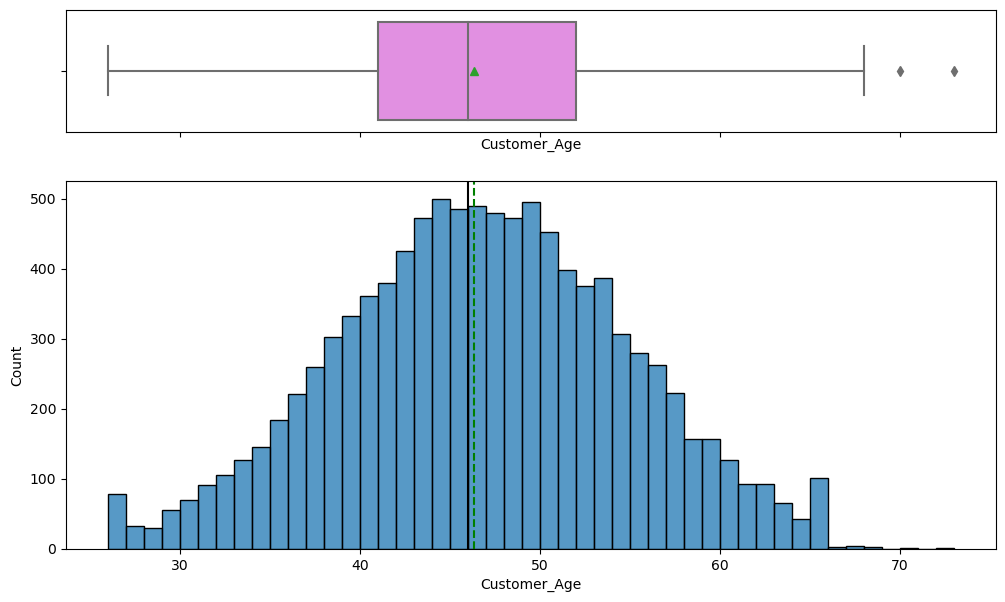

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "Customer_Age")

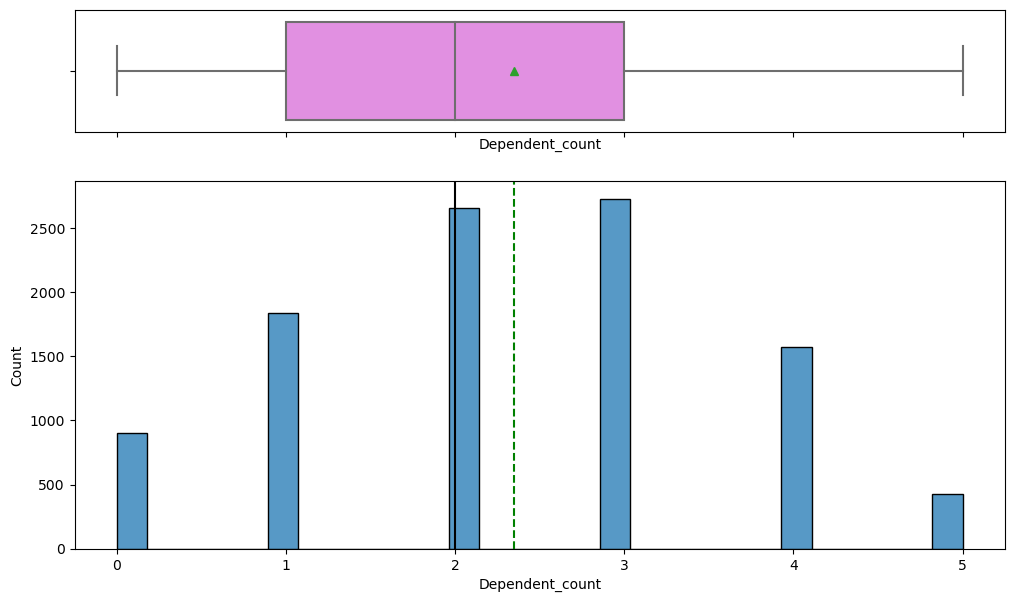

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "Dependent_count")

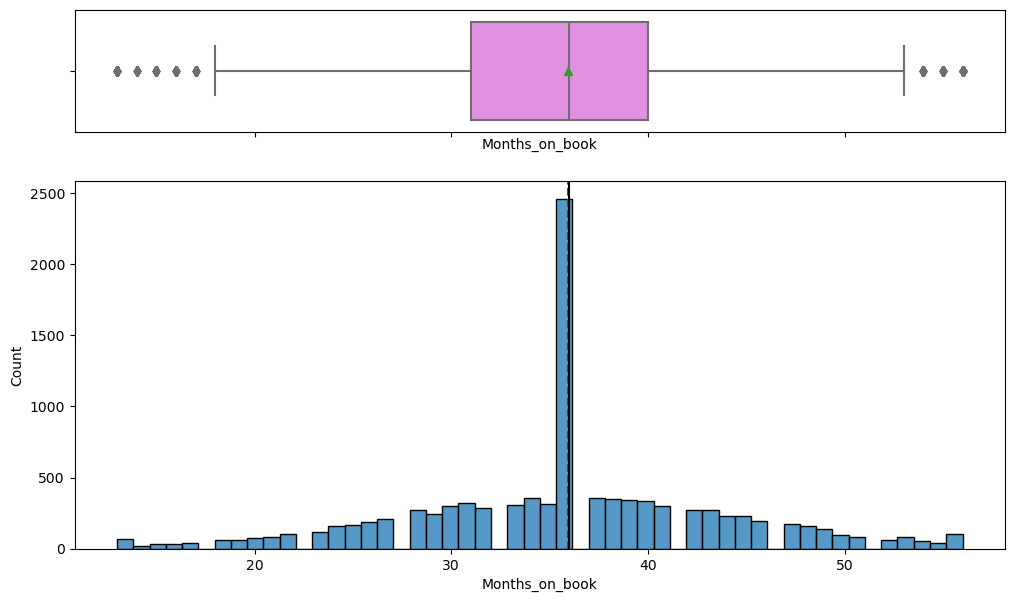

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "Months_on_book")

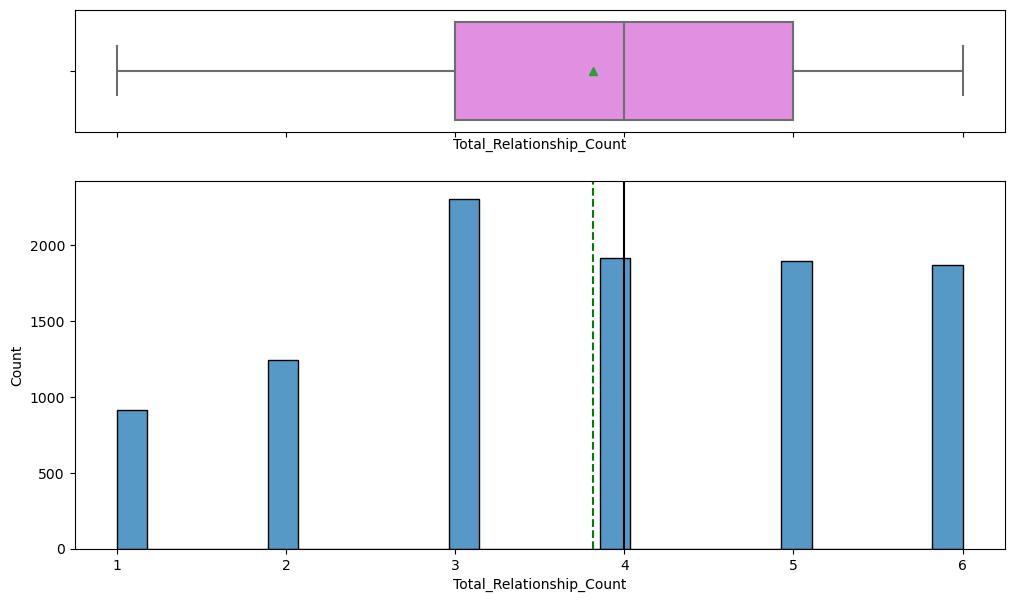

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "Total_Relationship_Count")

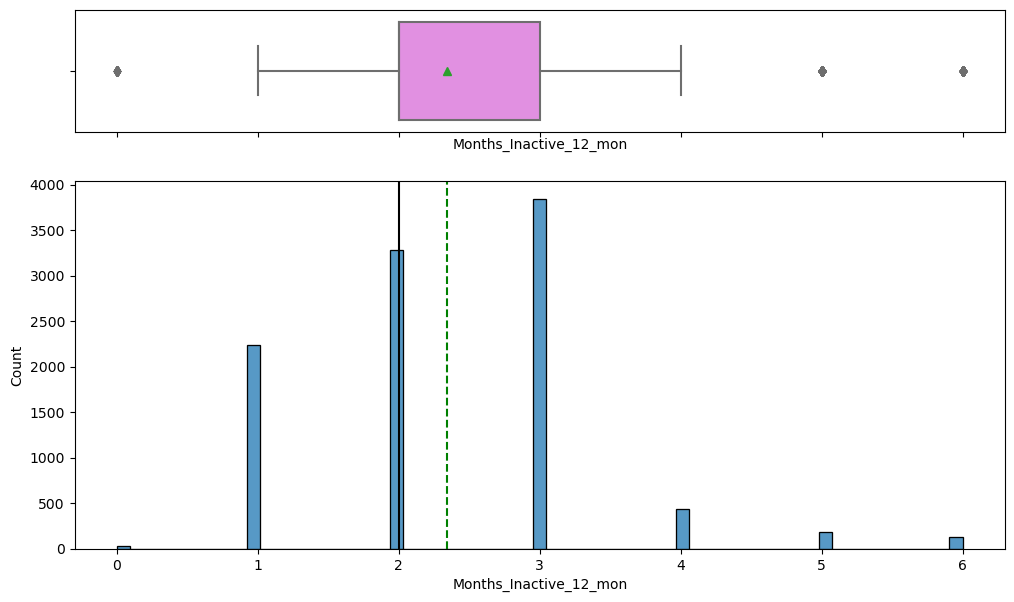

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(df, "Months_Inactive_12_mon")

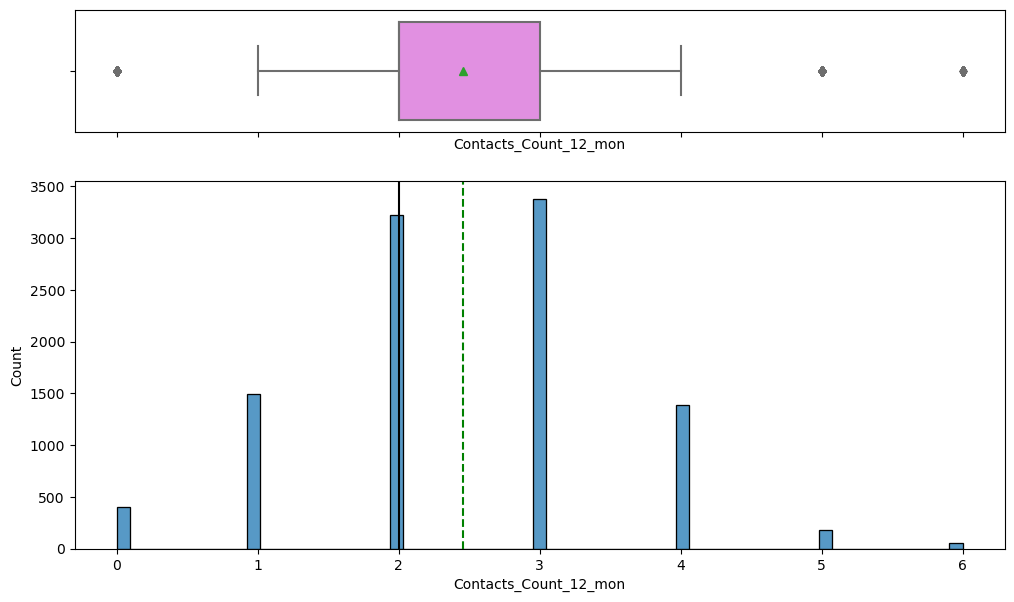

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "Contacts_Count_12_mon")

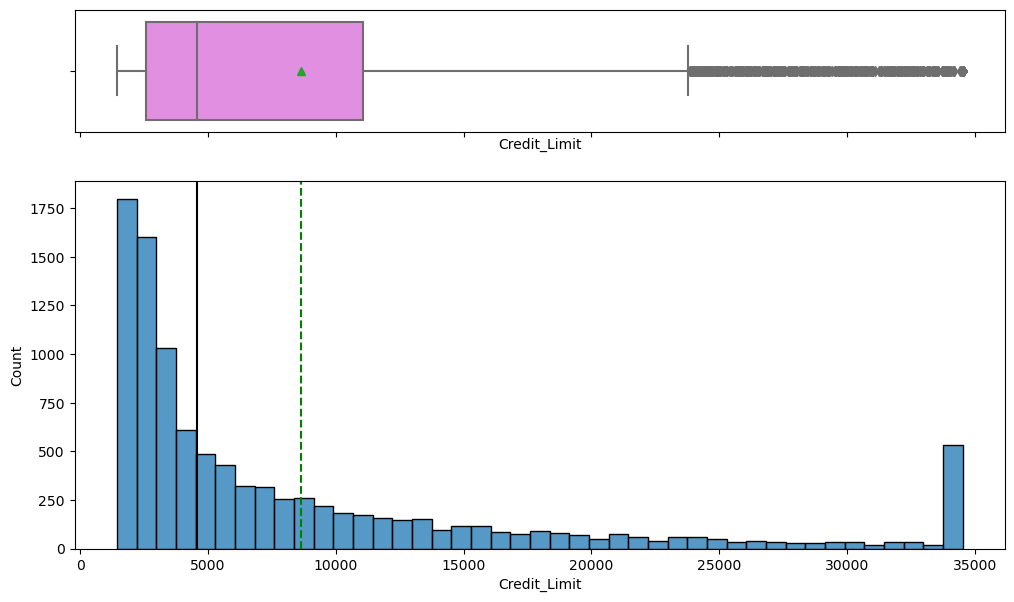

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "Credit_Limit")

In [28]:
# histogram_boxplot(df, "Total_Revolving_Bal ")

<IPython.core.display.Javascript object>

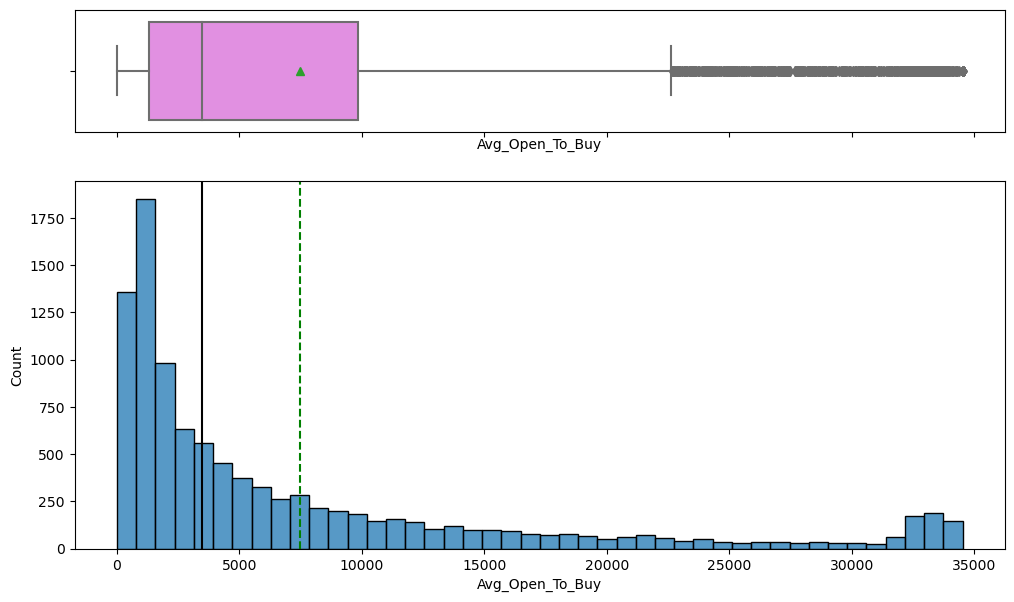

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "Avg_Open_To_Buy")

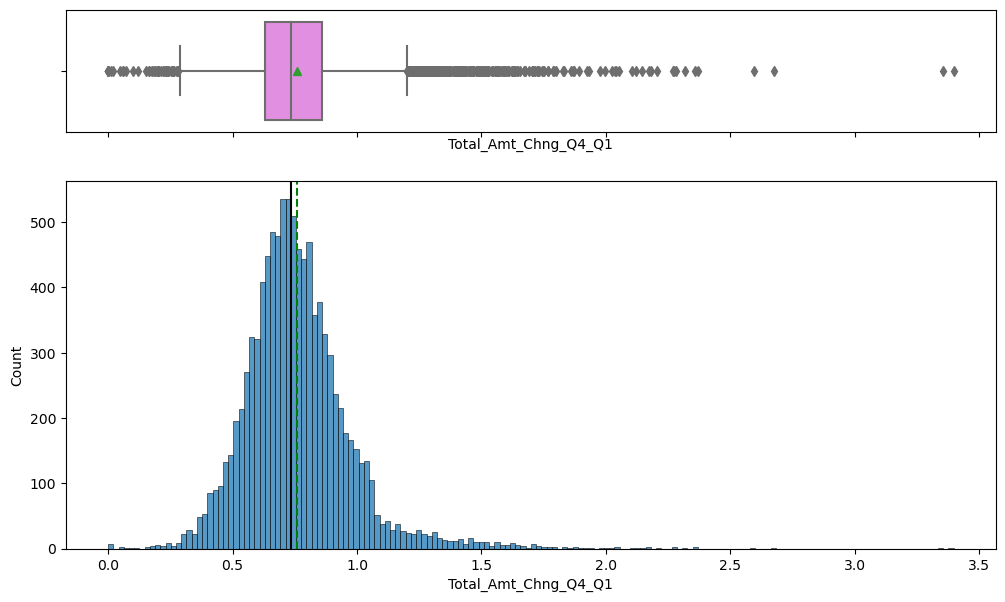

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

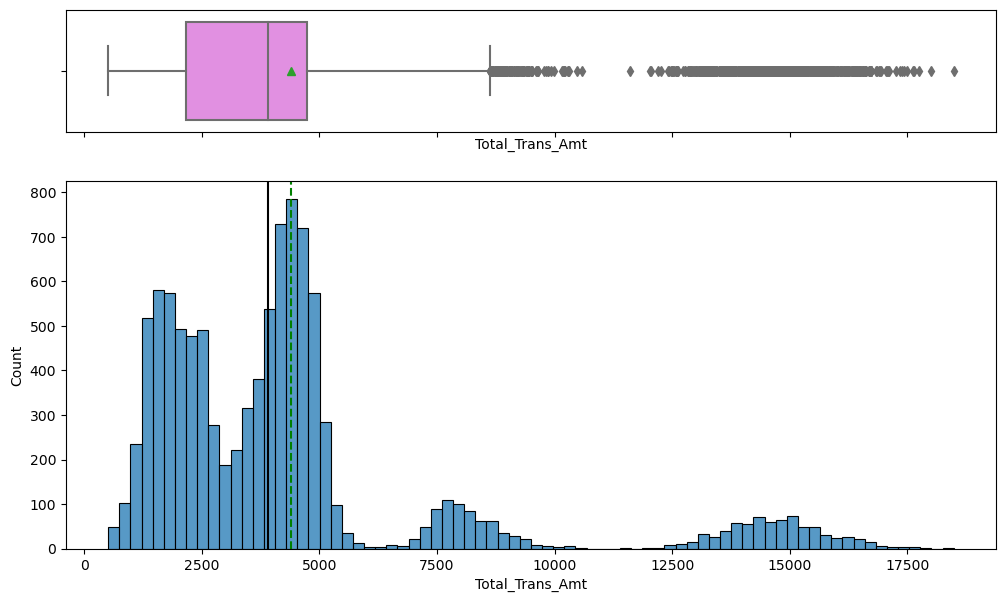

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "Total_Trans_Amt")

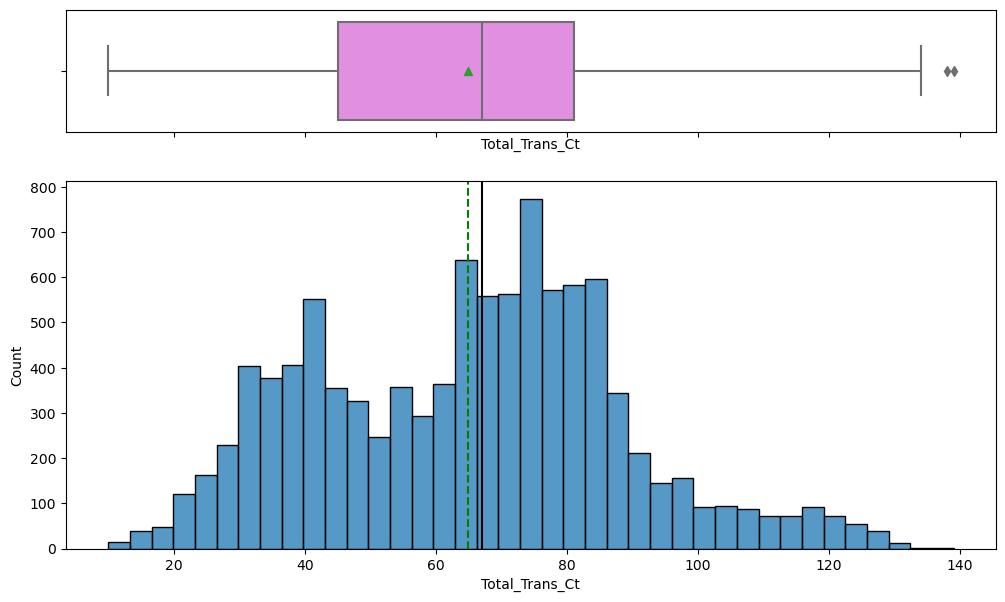

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "Total_Trans_Ct")

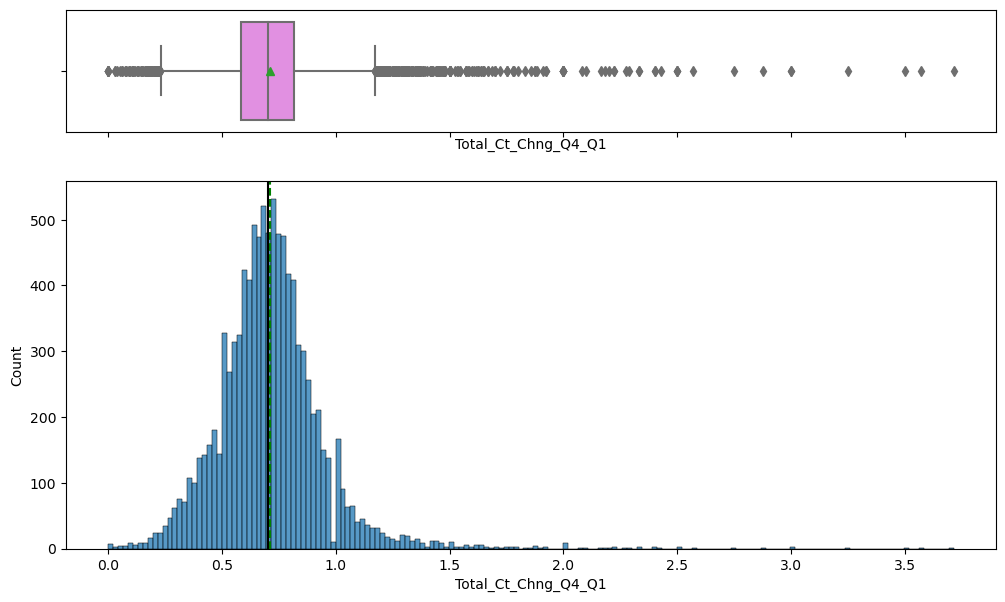

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

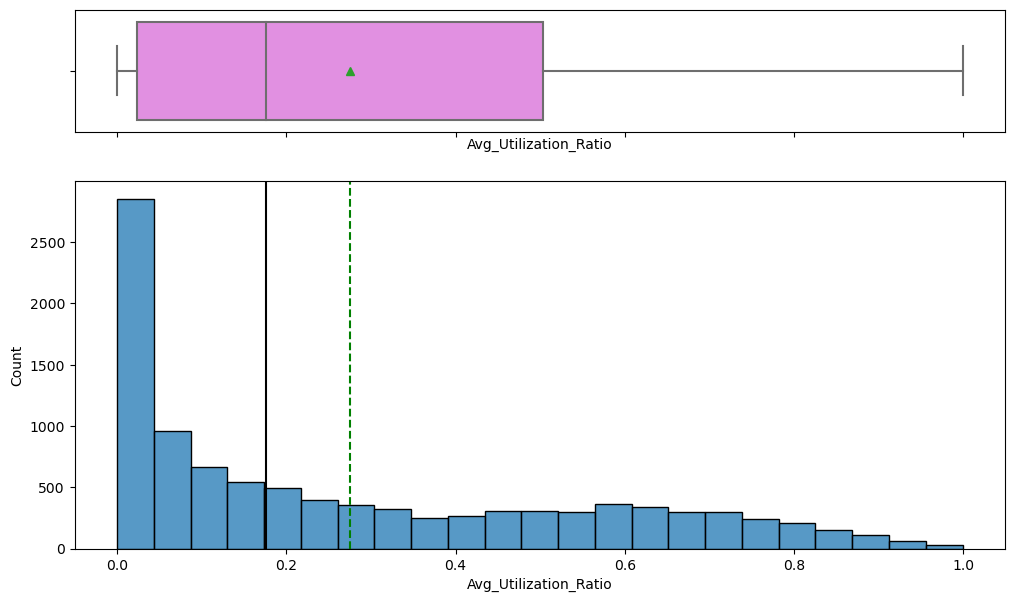

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

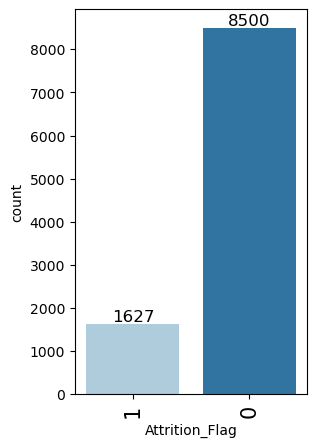

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "Attrition_Flag")

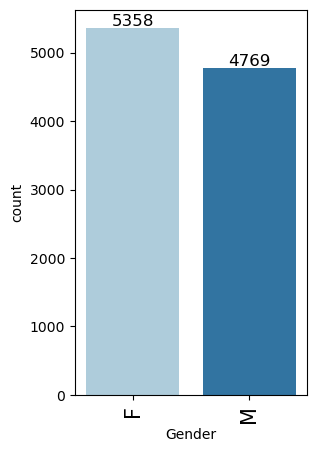

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "Gender")

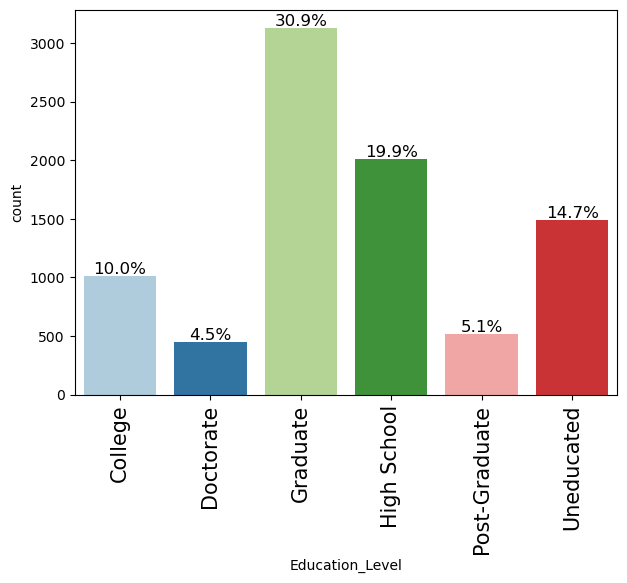

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "Education_Level", perc=True)

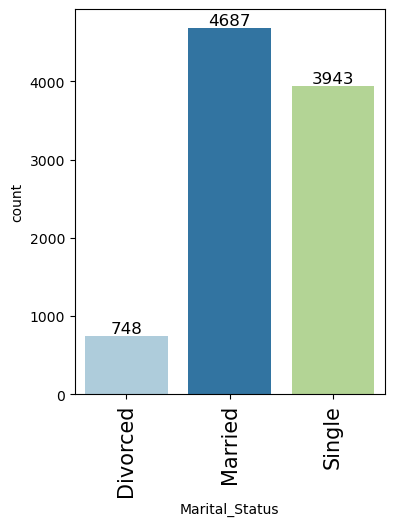

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "Marital_Status")

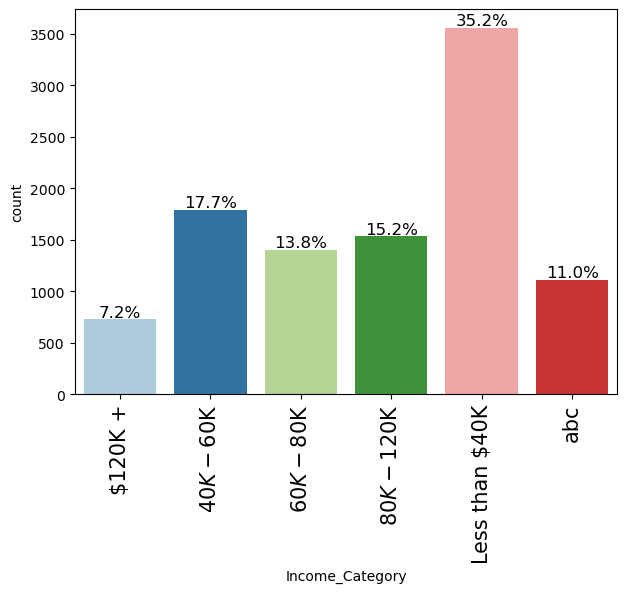

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "Income_Category", perc=True)

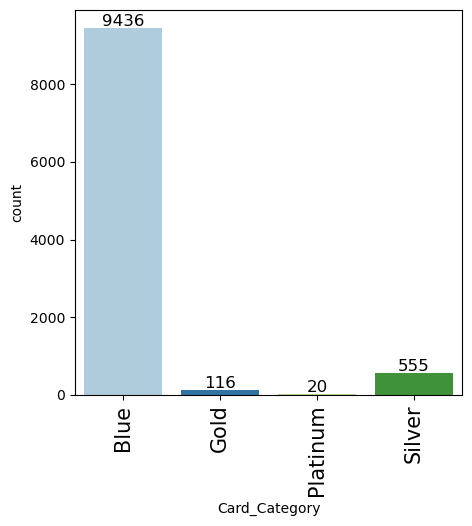

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "Card_Category")

##### Bivariate Analysis

Attrition_Flag      1     0    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
abc               187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


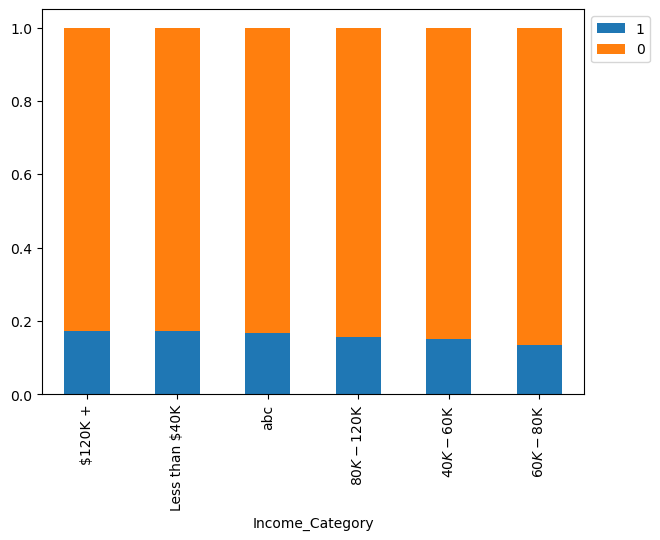

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag     1     0    All
Gender                           
All             1627  8500  10127
F                930  4428   5358
M                697  4072   4769
------------------------------------------------------------------------------------------------------------------------


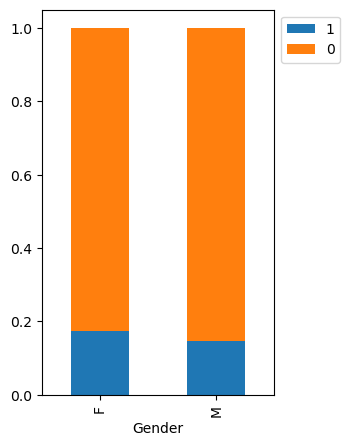

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag      1     0   All
Education_Level                  
All              1371  7237  8608
Graduate          487  2641  3128
High School       306  1707  2013
Uneducated        237  1250  1487
College           154   859  1013
Doctorate          95   356   451
Post-Graduate      92   424   516
------------------------------------------------------------------------------------------------------------------------


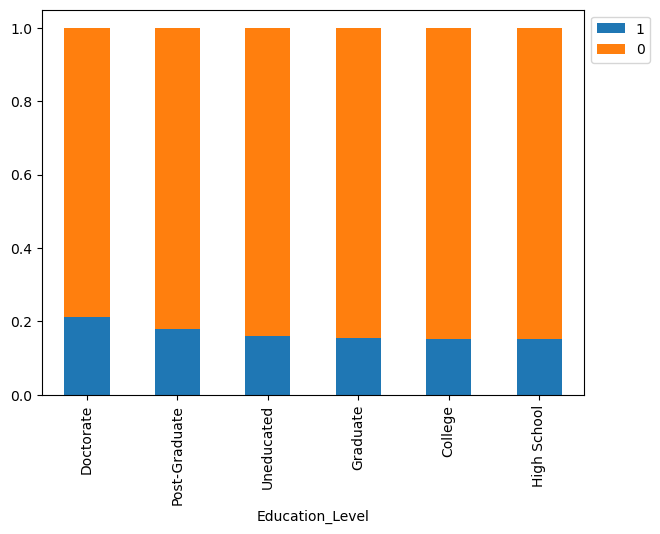

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag     1     0   All
Marital_Status                  
All             1498  7880  9378
Married          709  3978  4687
Single           668  3275  3943
Divorced         121   627   748
------------------------------------------------------------------------------------------------------------------------


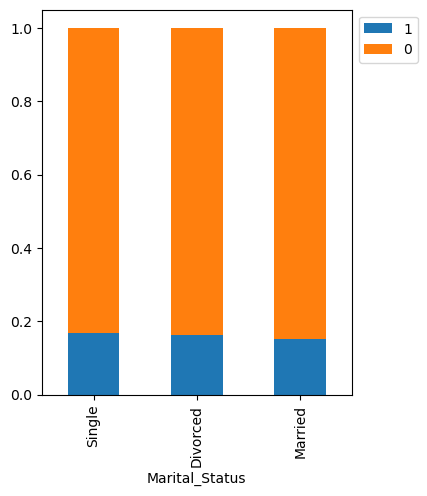

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag      1     0    All
Income_Category                   
All              1627  8500  10127
Less than $40K    612  2949   3561
$40K - $60K       271  1519   1790
$80K - $120K      242  1293   1535
$60K - $80K       189  1213   1402
abc               187   925   1112
$120K +           126   601    727
------------------------------------------------------------------------------------------------------------------------


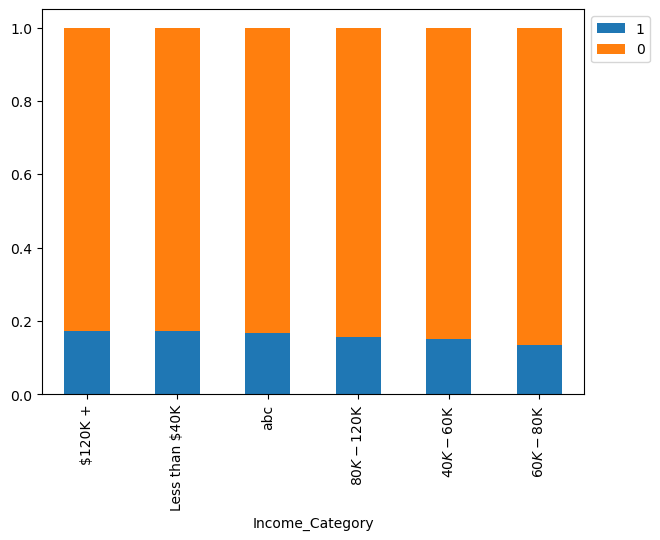

<IPython.core.display.Javascript object>

In [45]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag     1     0    All
Card_Category                    
All             1627  8500  10127
Blue            1519  7917   9436
Silver            82   473    555
Gold              21    95    116
Platinum           5    15     20
------------------------------------------------------------------------------------------------------------------------


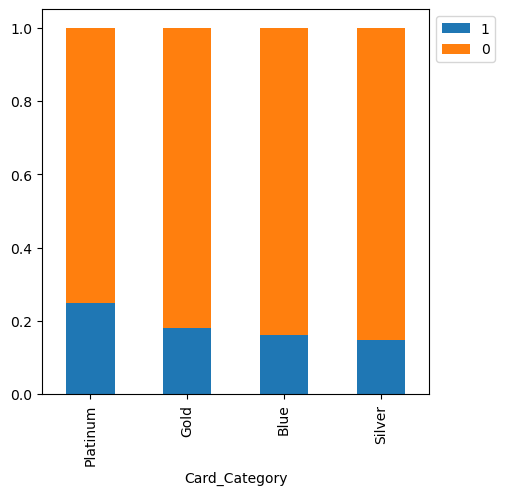

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

Attrition_Flag             1     0    All
Months_Inactive_12_mon                   
All                     1627  8500  10127
3                        826  3020   3846
2                        505  2777   3282
4                        130   305    435
1                        100  2133   2233
5                         32   146    178
6                         19   105    124
0                         15    14     29
------------------------------------------------------------------------------------------------------------------------


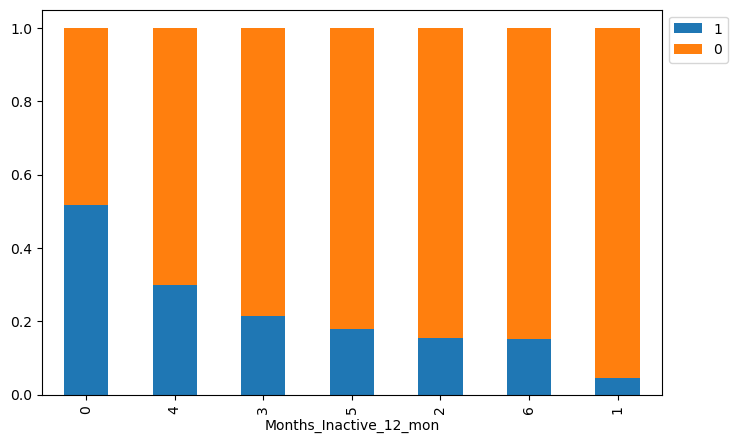

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

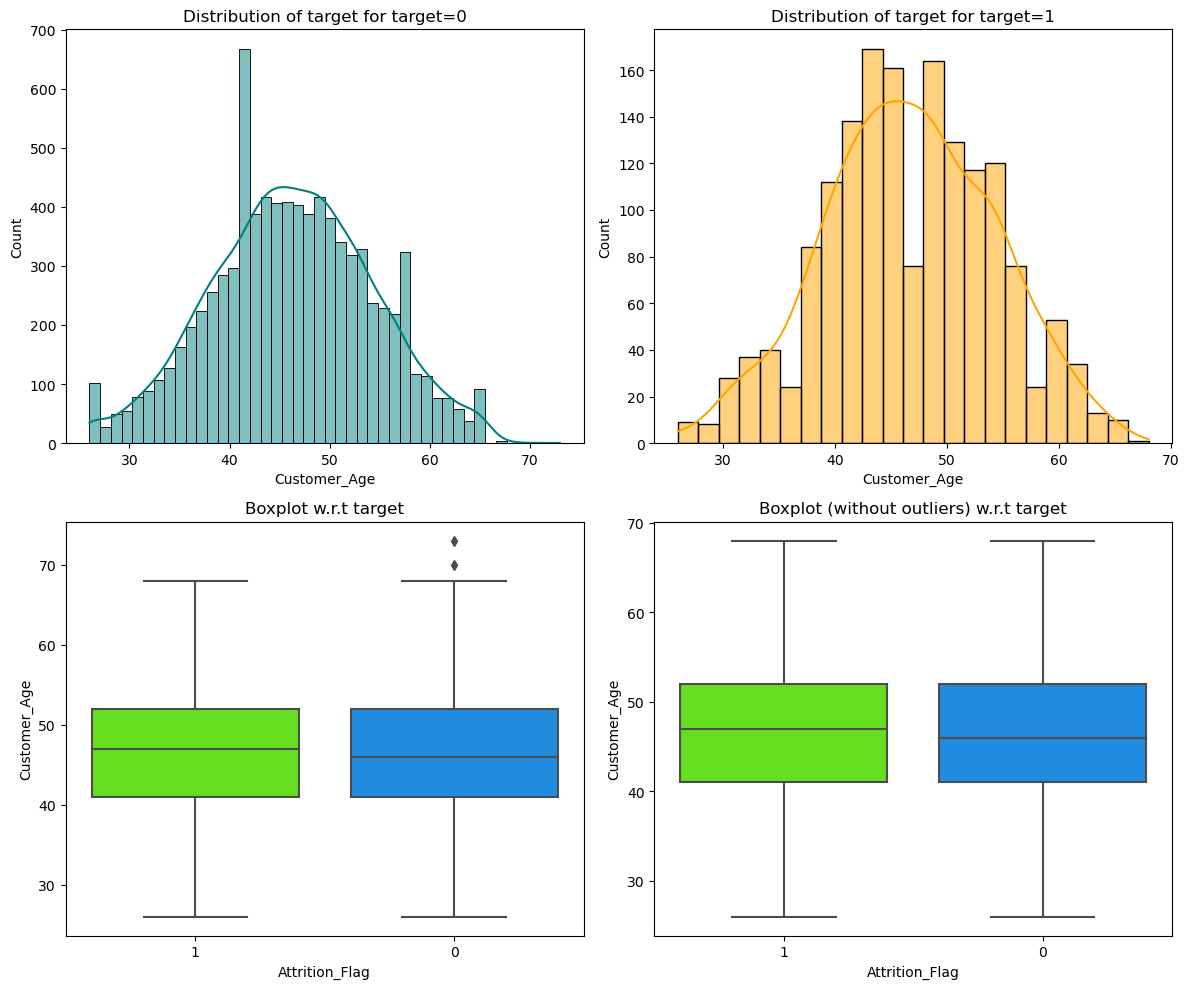

<IPython.core.display.Javascript object>

In [48]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

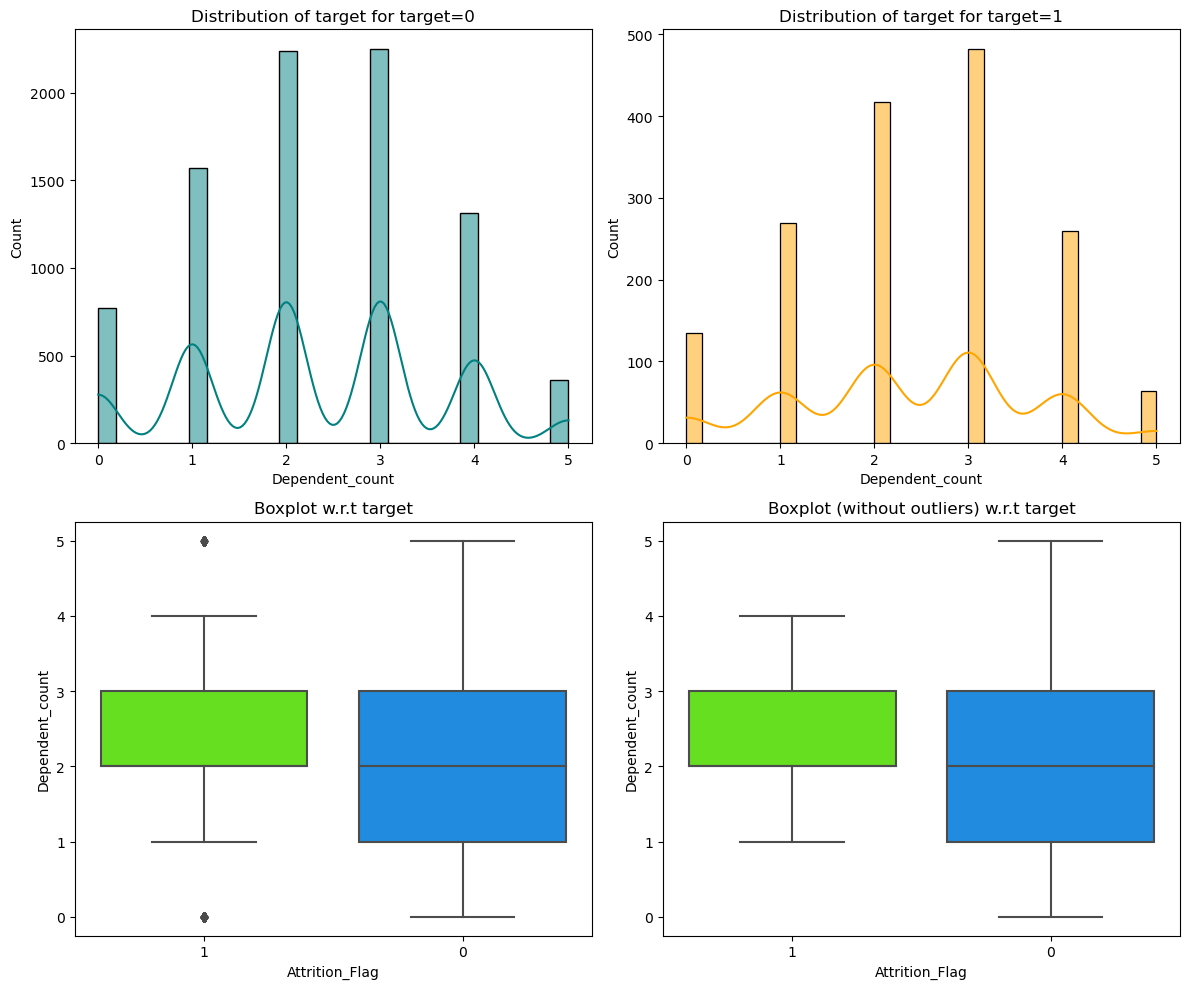

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(df, "Dependent_count", "Attrition_Flag")

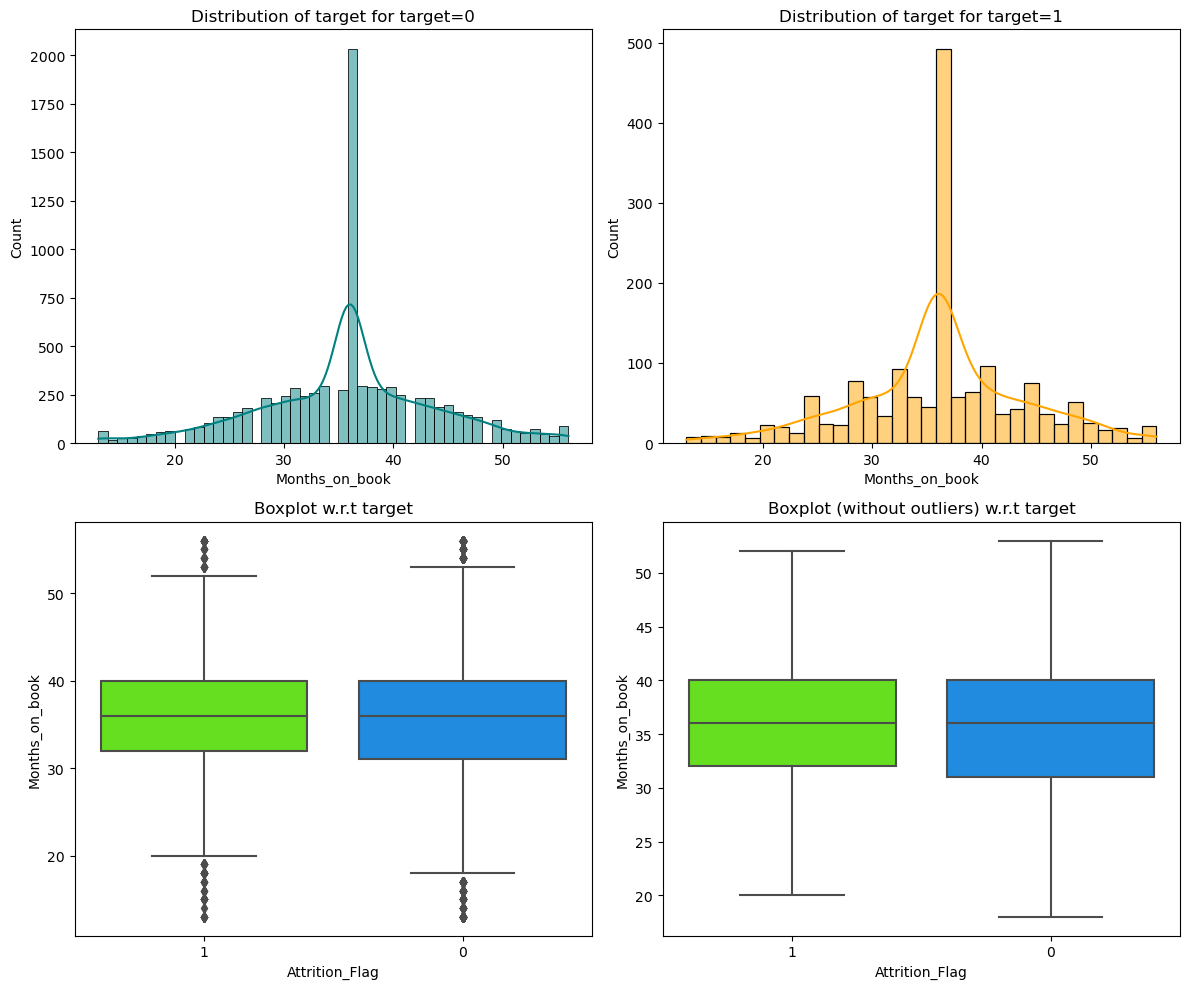

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

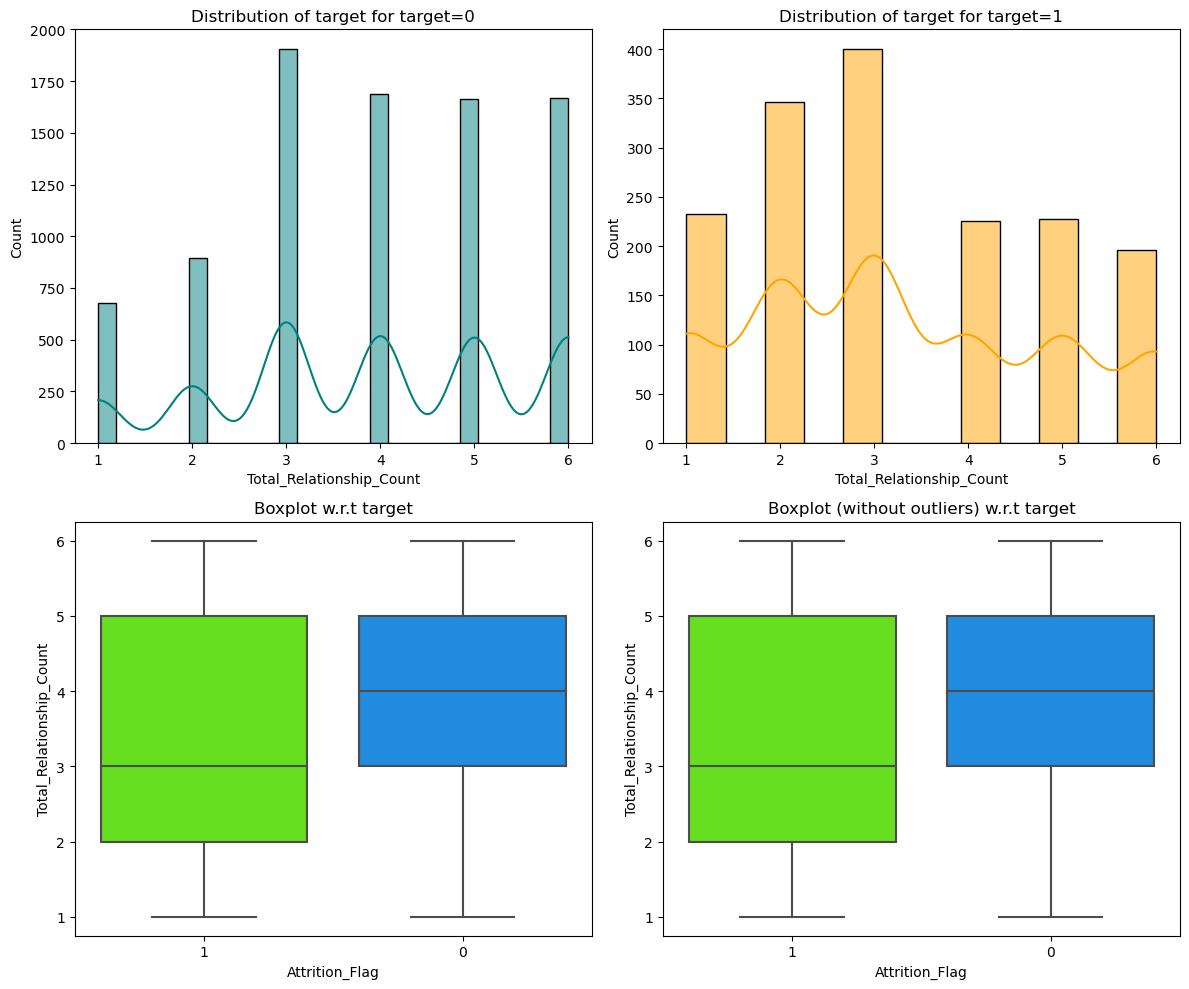

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(df, "Total_Relationship_Count", "Attrition_Flag")

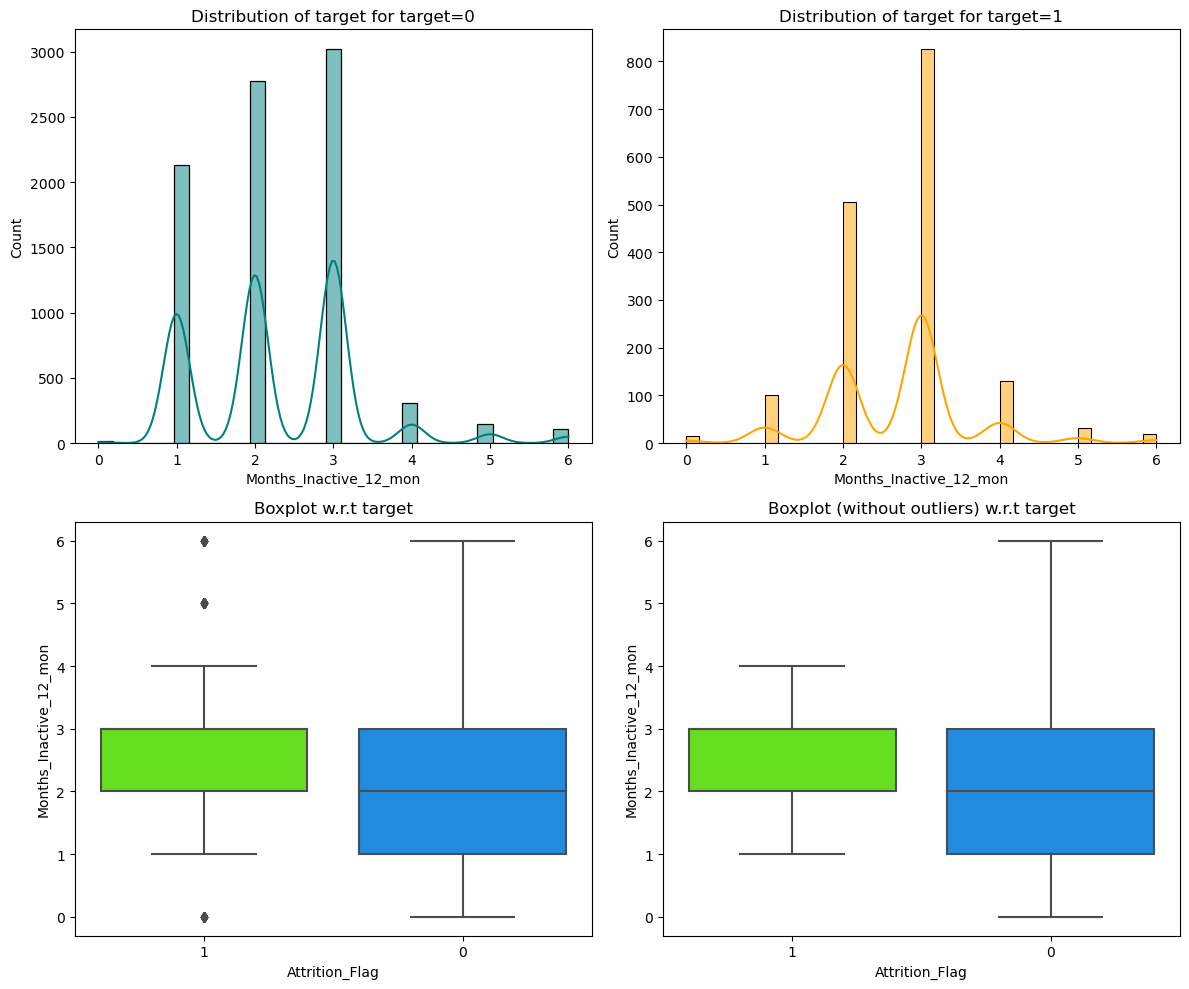

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(df, "Months_Inactive_12_mon", "Attrition_Flag")

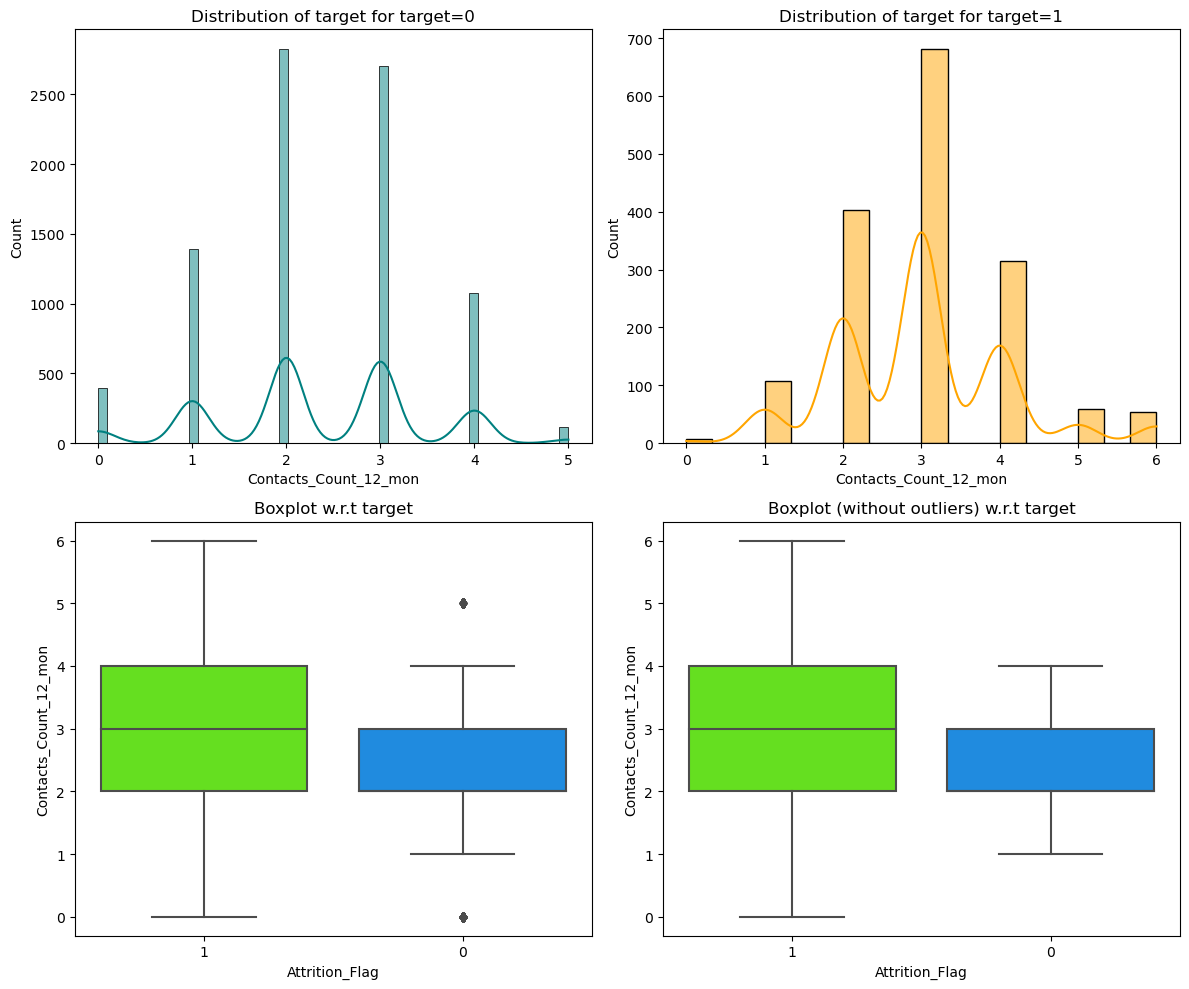

<IPython.core.display.Javascript object>

In [53]:
distribution_plot_wrt_target(df, "Contacts_Count_12_mon", "Attrition_Flag")

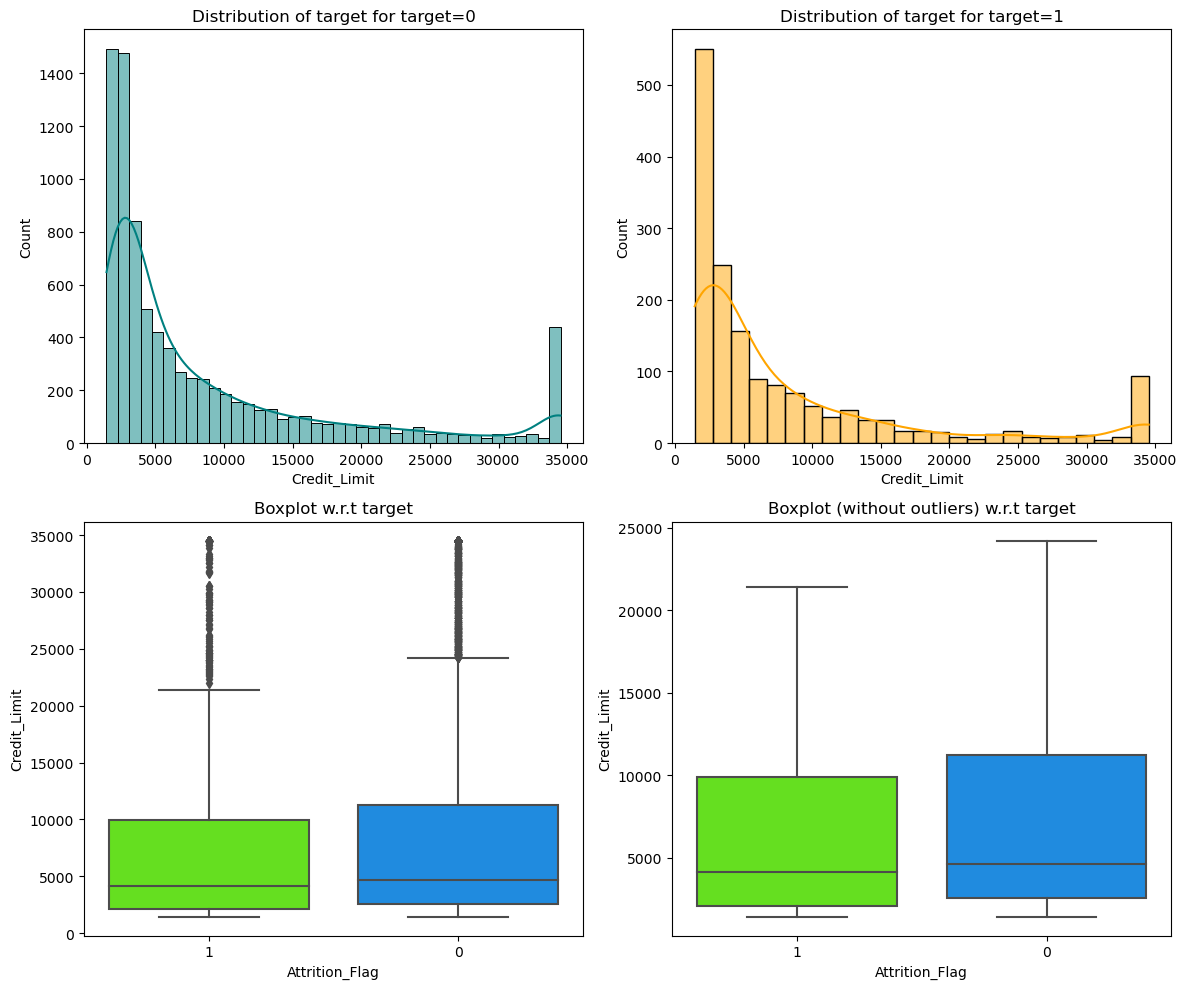

<IPython.core.display.Javascript object>

In [54]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

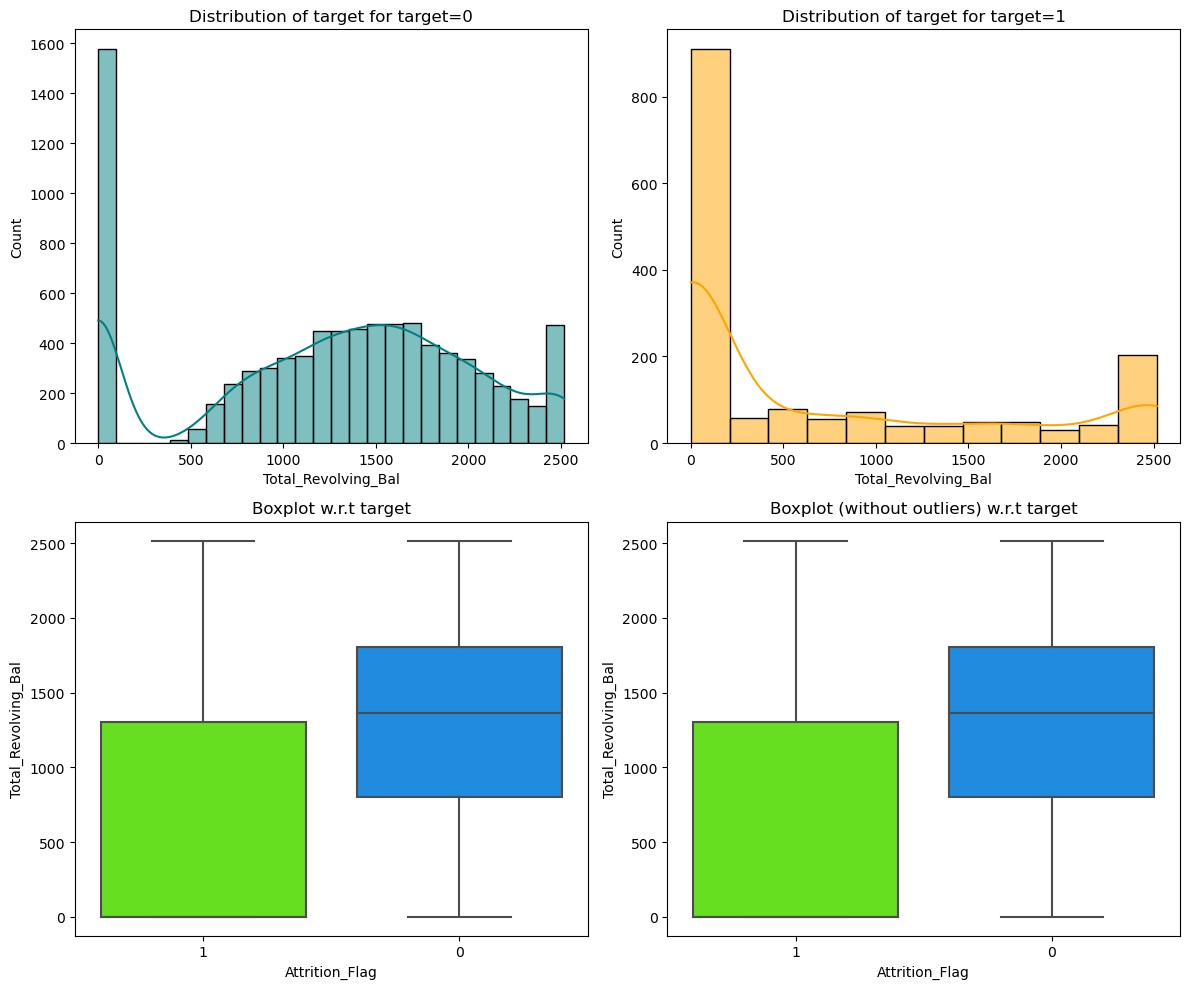

<IPython.core.display.Javascript object>

In [55]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

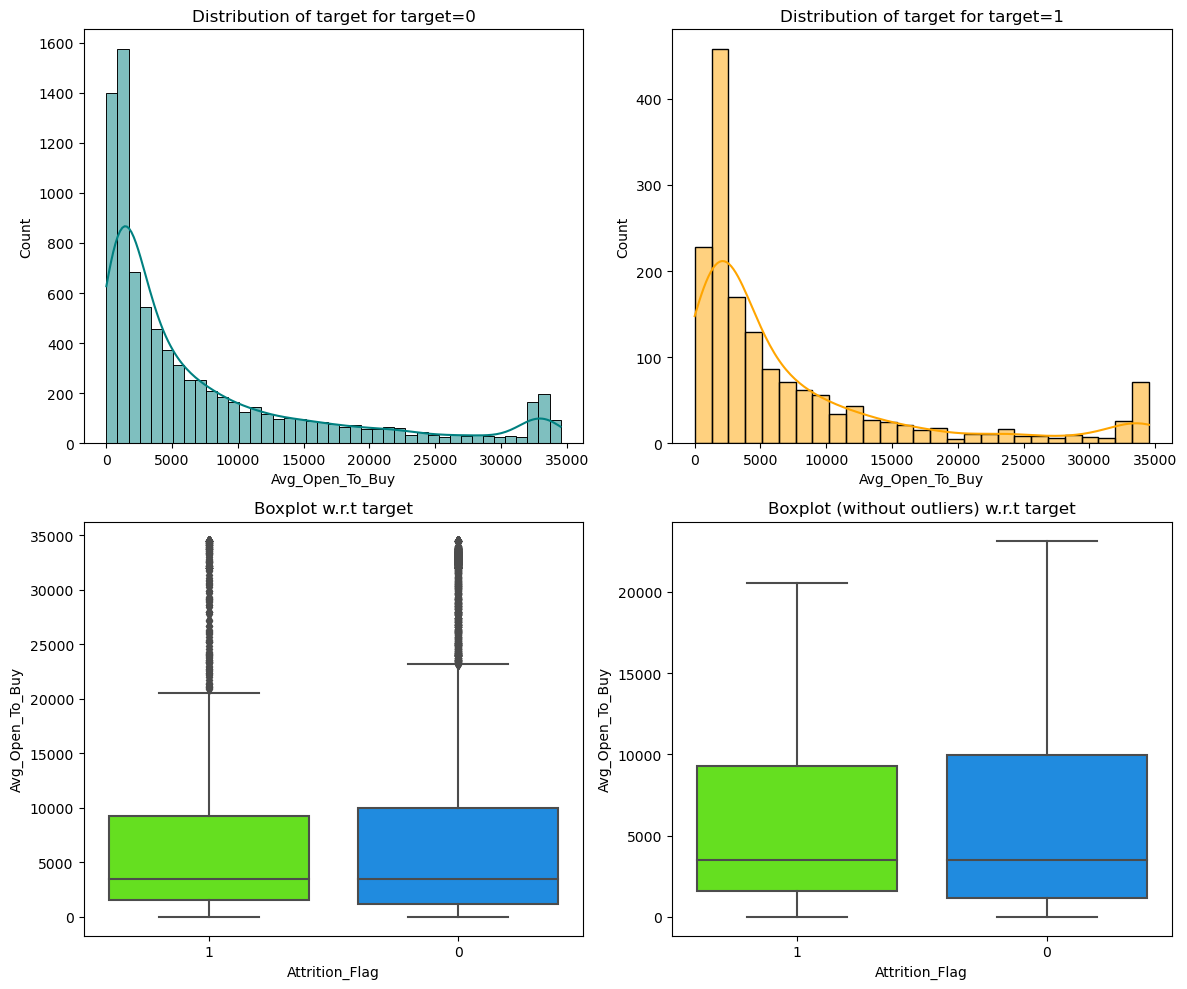

<IPython.core.display.Javascript object>

In [56]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

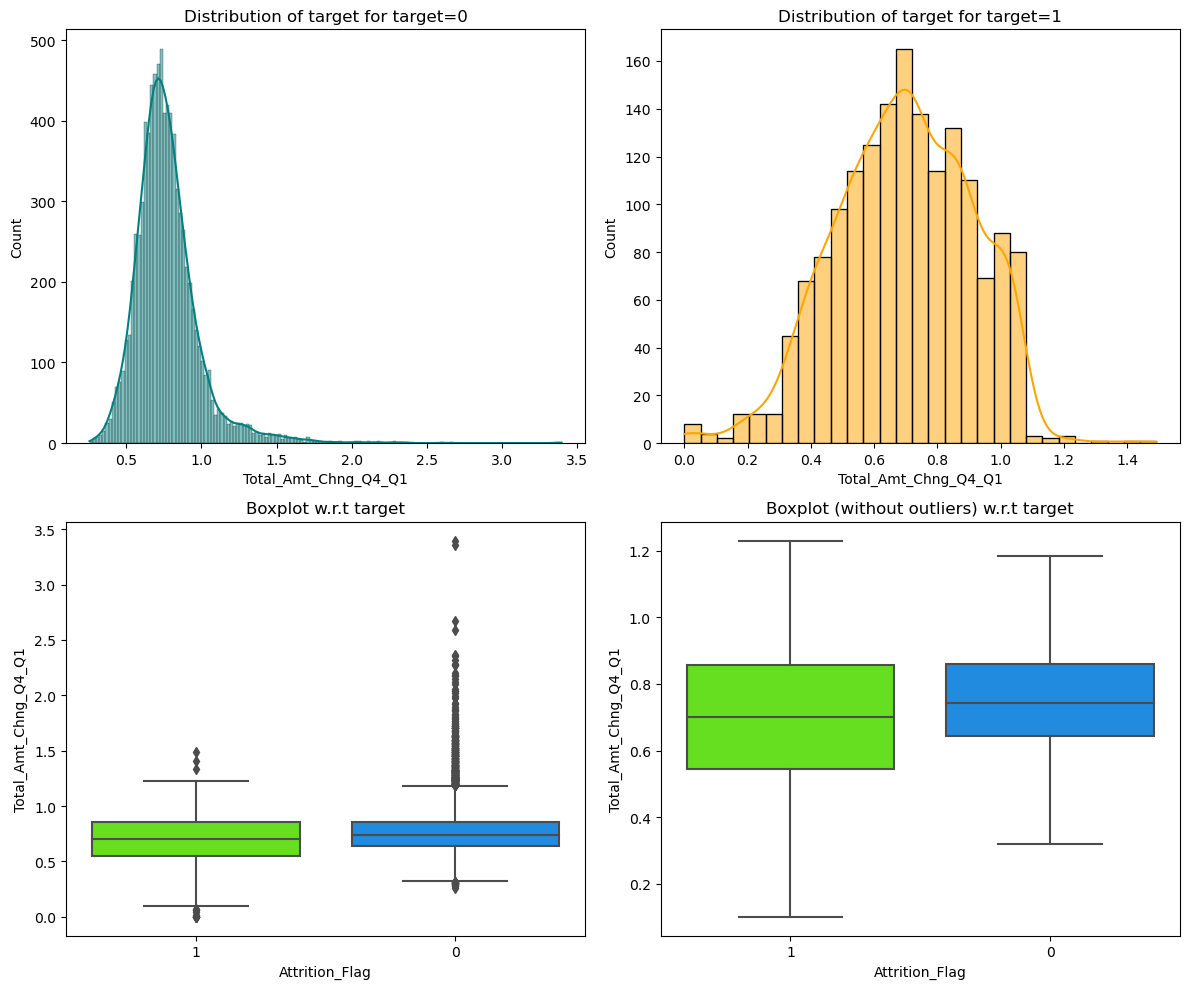

<IPython.core.display.Javascript object>

In [57]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

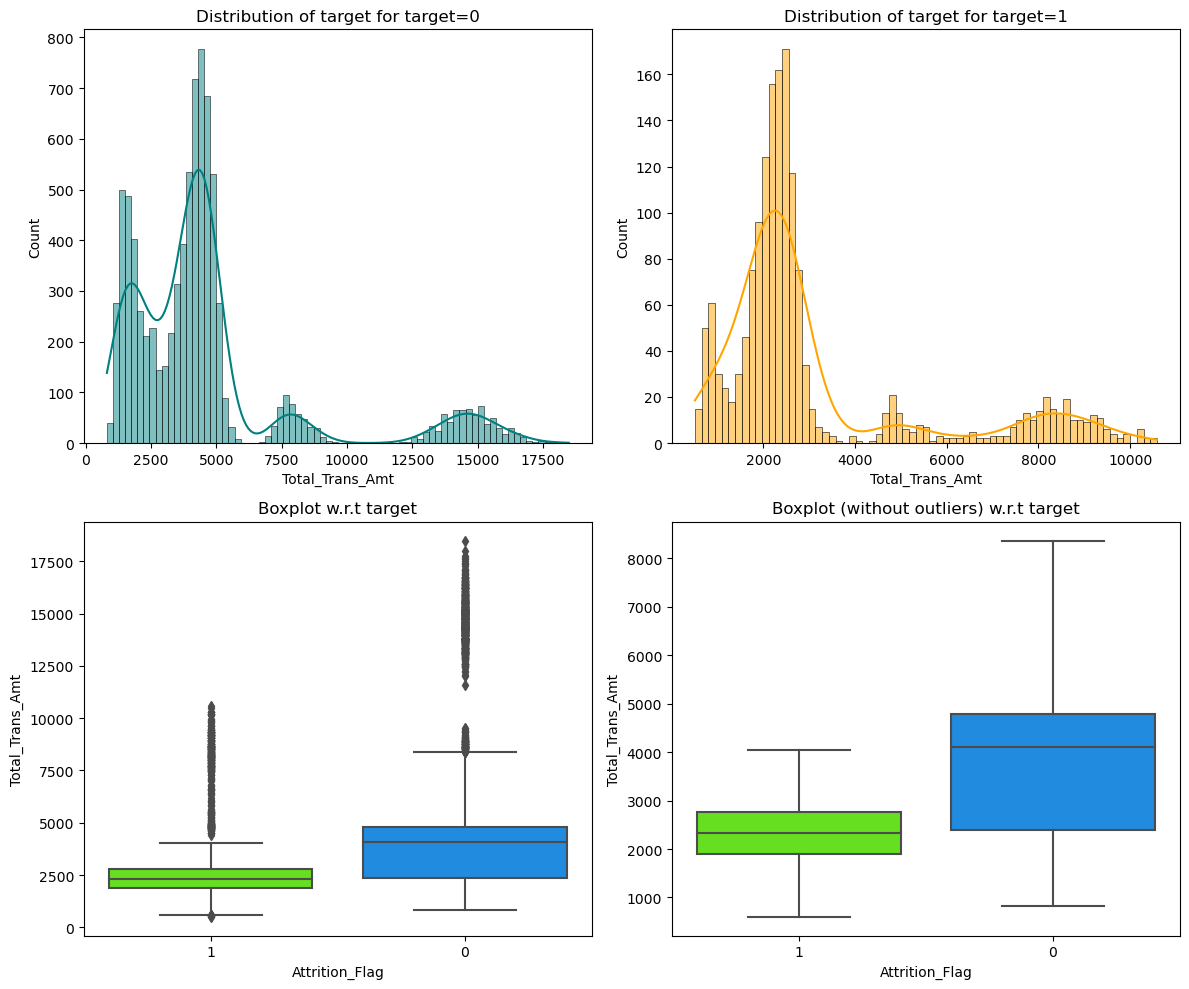

<IPython.core.display.Javascript object>

In [58]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

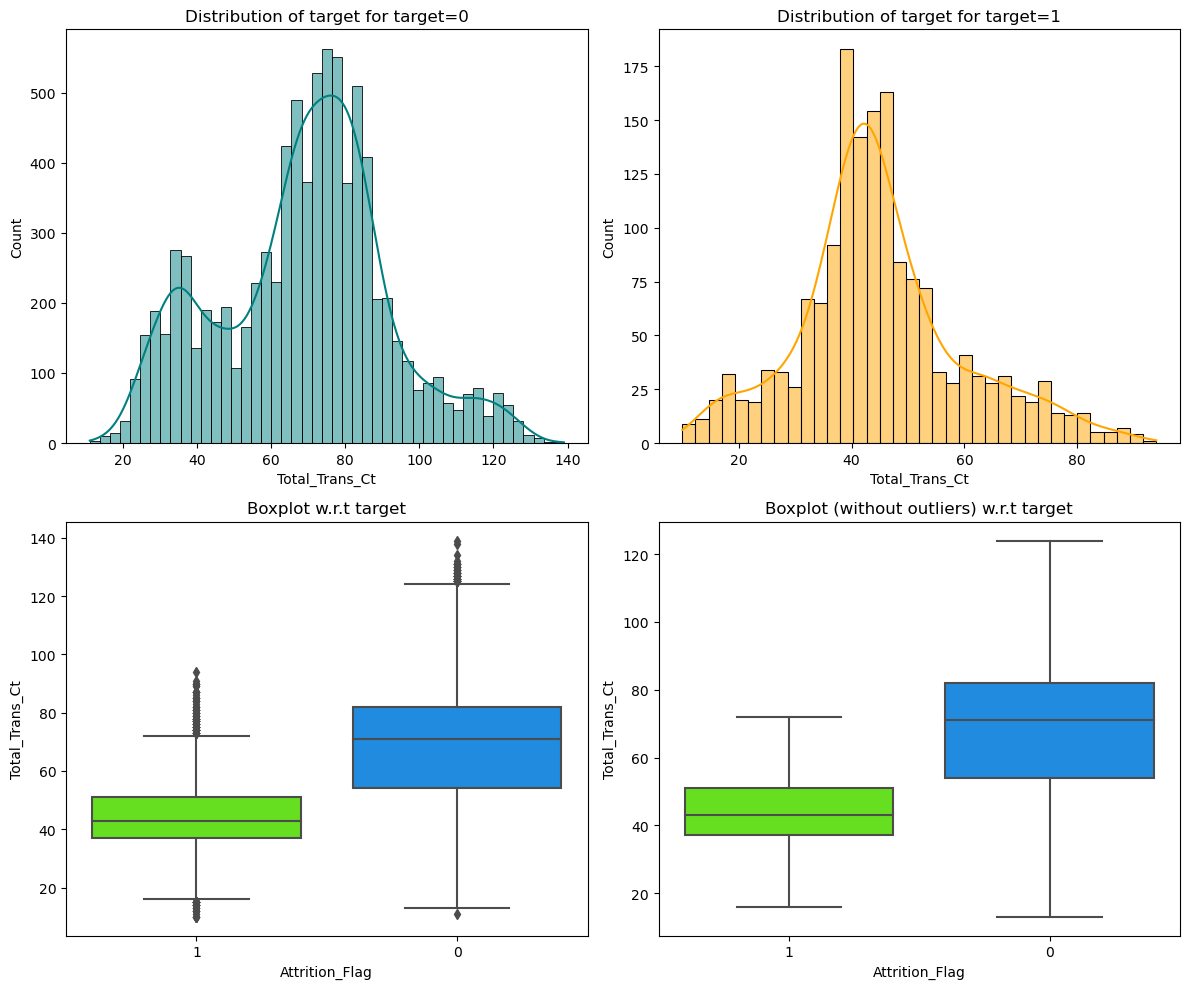

<IPython.core.display.Javascript object>

In [59]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

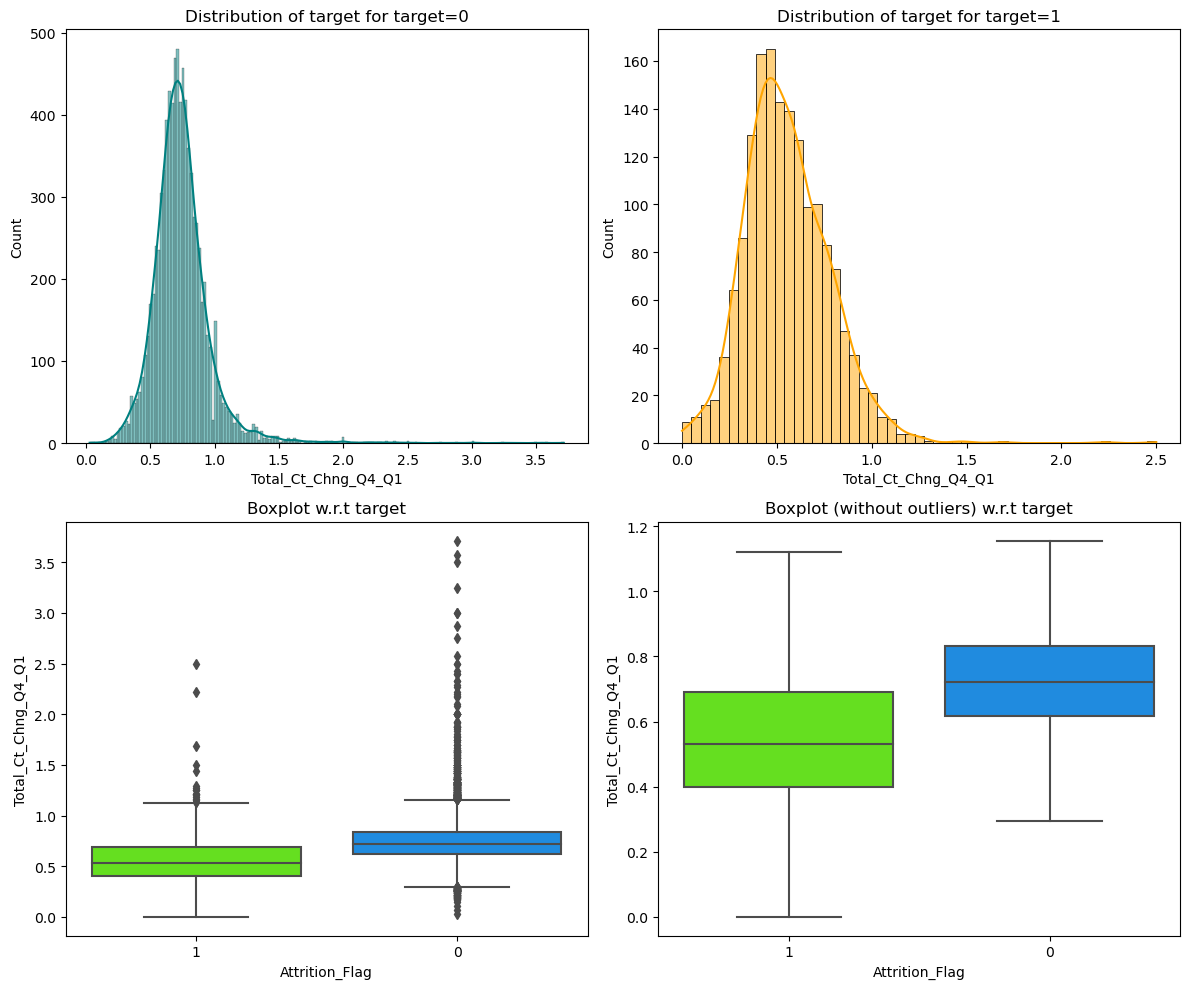

<IPython.core.display.Javascript object>

In [60]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

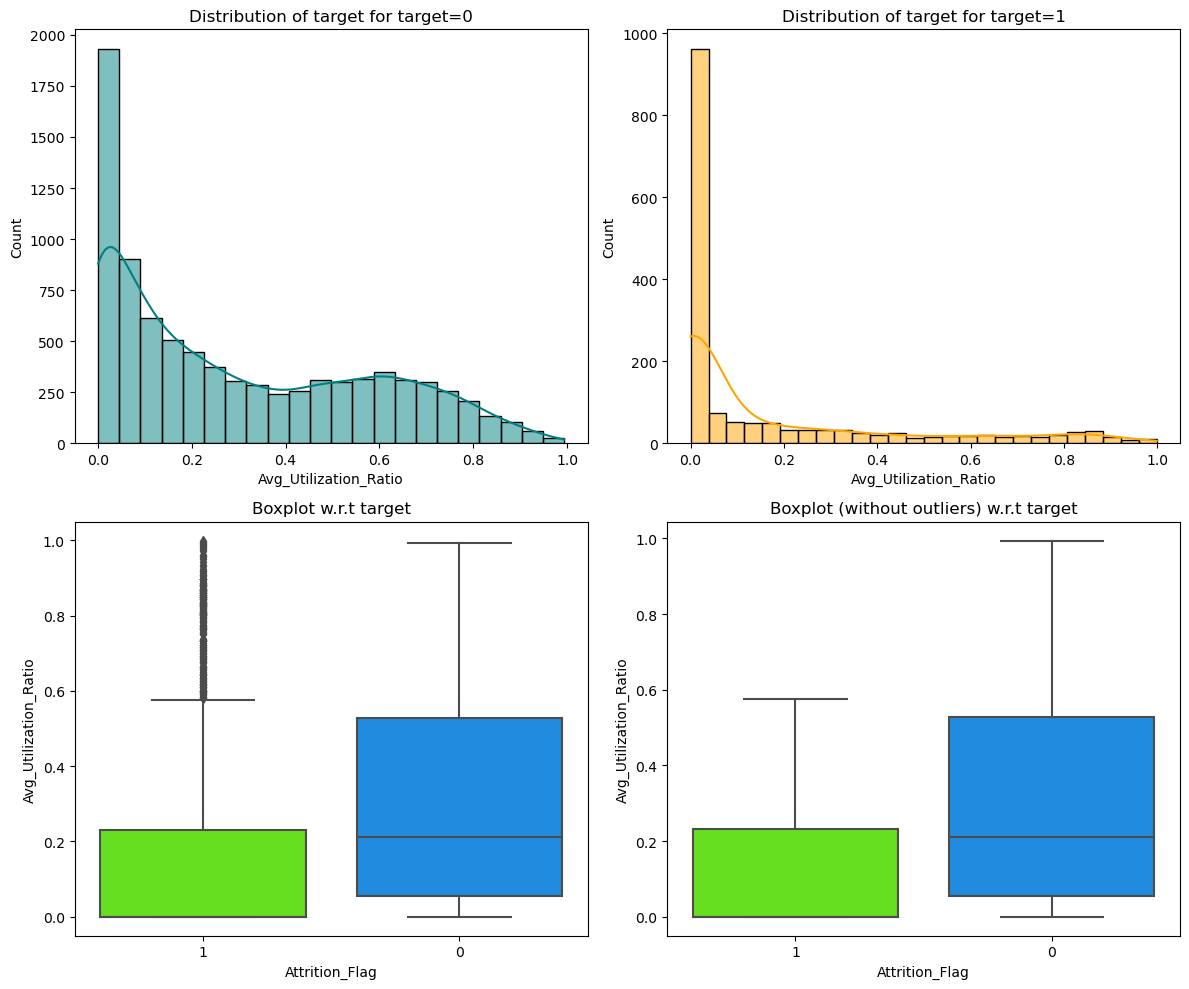

<IPython.core.display.Javascript object>

In [61]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

##### Multi-variate analysis

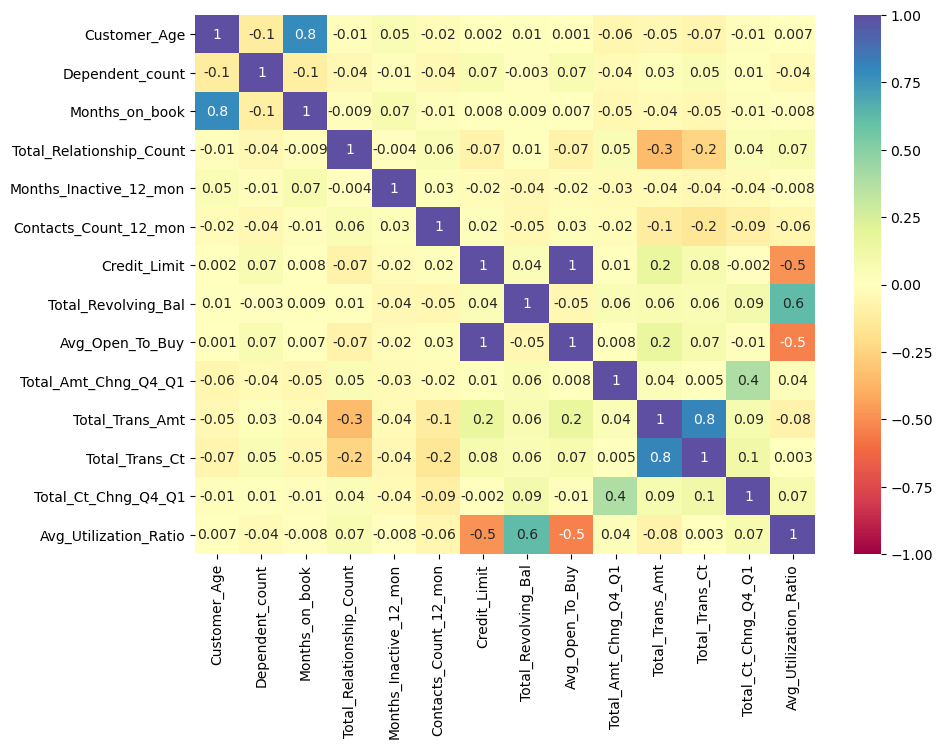

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".1g", cmap="Spectral")
plt.show()

##### Observations

- Total Transaction Amount 

    . Highly Right skewed with many outliers

    . Average transaction amount is 4404, minimum is 510 and maximum is 18484, 75% the customers have less than 4741

    . Level of Education of customers

    . Most of the customers are Graduates which is 30.9% and customers who are high schoolers are next highest which is 19.9%
    
    . Percentage of customers who are Doctorates and postgraduates are less relatively which is 4.5% and 5.1% respectively


- Level of Income of Customers

    . Most of the customers have income less than $40K which is 35.2%
    
    . Least percentage of customers have income more than 120K which is 7.2$
    
    . Most of the attrited customers have salary less than 40K 

- Change in transaction amount between Q4 and Q1 (`Total_Amt_Chng_Q4_Q1`) with respect to Attrition_Flag

    . Distribution of data is highly right skewed with many outliers
    
    . Change in transaction amount between Q4 and Q1 for Existing customers is highly right skewed with many outliers
    
    . Change in transaction amount between Q4 and Q1 for Existing customers is normal when compared to that of existing customers but with some outliers


- Months_Inactive_12_mon 


    . Most of the attrited customers are inactive for 3 months (826 customers). 

        That means there are chances for customers who are inactive for 3 or more months to close their credit cards. 3020 existing customers are inactive for 3 months and bank needs to take measures by providing extra offers to these customers in order to retain them
        
    . Less number of attrited customers are inactive for 6 months (19 customers)

- Attributes that have strong correlation

    . Total_Trans_Amt and Total_Trans_Ct 0.8

    . Customer_Age and Months_on_book 0.8

    . Total_Revolving_Bal and Avg_Utilization_Ratio 0.6

    . Negative correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio which is -0.5

    . Negative correlation between Credit_Limit and Avg_Utilization_Ratio which is -0.5

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

## Data Pre-processing

In [64]:
df_new = df.copy()

<IPython.core.display.Javascript object>

#### Outlier Detection

In [65]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

<IPython.core.display.Javascript object>

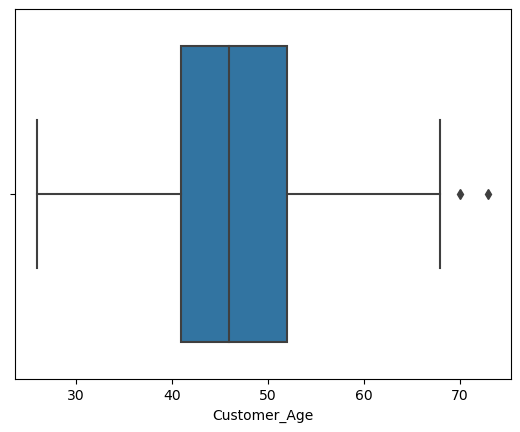

<IPython.core.display.Javascript object>

In [66]:
sns.boxplot(data=df_new, x="Customer_Age")
plt.show()

In [67]:
df_new = treat_outliers(df_new, "Dependent_count")

<IPython.core.display.Javascript object>

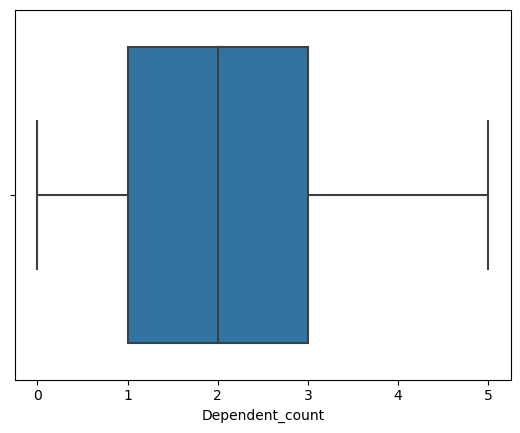

<IPython.core.display.Javascript object>

In [68]:
sns.boxplot(data=df_new, x="Dependent_count")
plt.show()

In [69]:
df_new = treat_outliers(df_new, "Months_on_book")

<IPython.core.display.Javascript object>

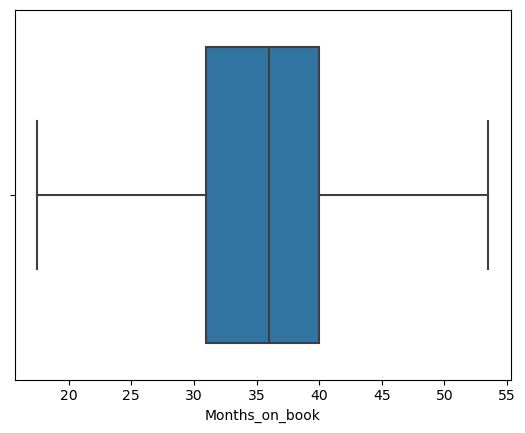

<IPython.core.display.Javascript object>

In [70]:
sns.boxplot(data=df_new, x="Months_on_book")
plt.show()

In [71]:
df_new = treat_outliers(df_new, "Total_Relationship_Count")

<IPython.core.display.Javascript object>

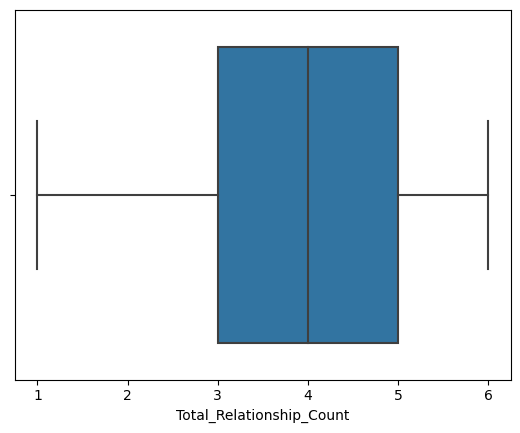

<IPython.core.display.Javascript object>

In [72]:
sns.boxplot(data=df_new, x="Total_Relationship_Count")
plt.show()

In [73]:
df_new = treat_outliers(df_new, "Months_Inactive_12_mon")


<IPython.core.display.Javascript object>

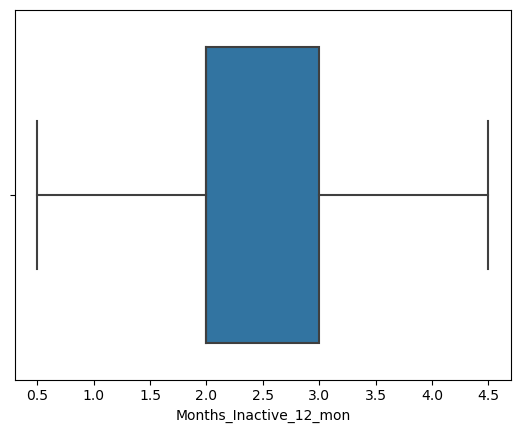

<IPython.core.display.Javascript object>

In [74]:
sns.boxplot(data=df_new, x="Months_Inactive_12_mon")
plt.show()

In [75]:
df_new = treat_outliers(df_new, "Contacts_Count_12_mon")

<IPython.core.display.Javascript object>

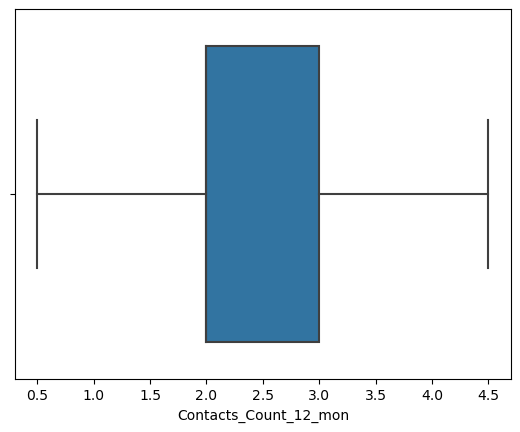

<IPython.core.display.Javascript object>

In [76]:
sns.boxplot(data=df_new, x="Contacts_Count_12_mon")
plt.show()

In [77]:
df_new = treat_outliers(df_new, "Credit_Limit")

<IPython.core.display.Javascript object>

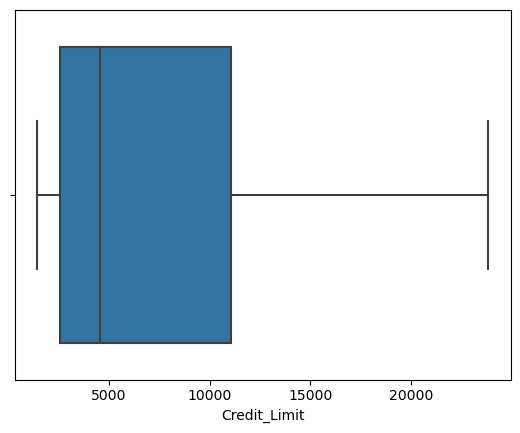

<IPython.core.display.Javascript object>

In [78]:
sns.boxplot(data=df_new, x="Credit_Limit")
plt.show()

In [79]:
df_new = treat_outliers(df_new, "Avg_Open_To_Buy")

<IPython.core.display.Javascript object>

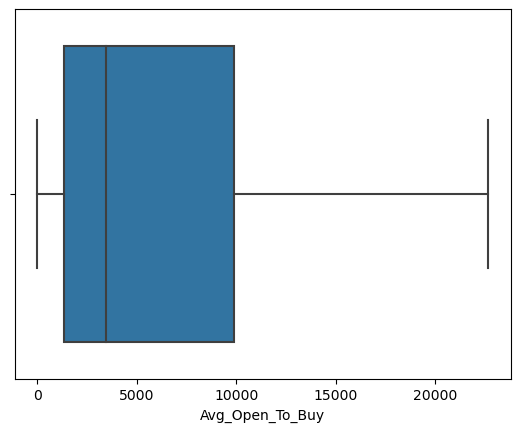

<IPython.core.display.Javascript object>

In [80]:
sns.boxplot(data=df_new, x="Avg_Open_To_Buy")
plt.show()

In [81]:
df_new = treat_outliers(df_new, "Total_Amt_Chng_Q4_Q1")

<IPython.core.display.Javascript object>

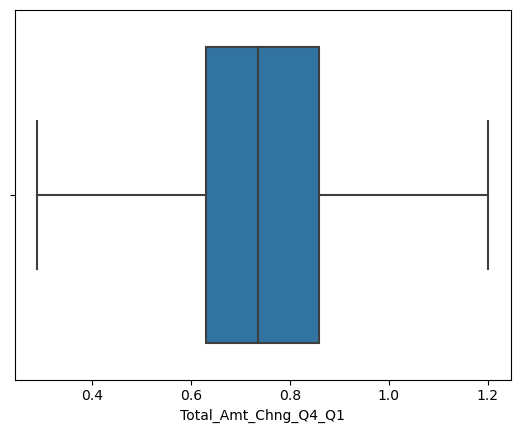

<IPython.core.display.Javascript object>

In [82]:
sns.boxplot(data=df_new, x="Total_Amt_Chng_Q4_Q1")
plt.show()

In [83]:
df_new = treat_outliers(df_new, "Total_Trans_Amt")

<IPython.core.display.Javascript object>

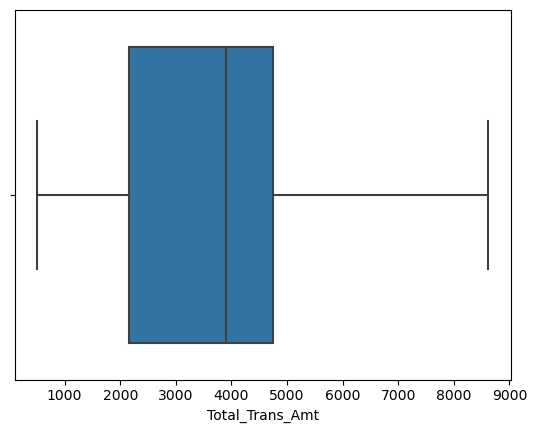

<IPython.core.display.Javascript object>

In [84]:
sns.boxplot(data=df_new, x="Total_Trans_Amt")
plt.show()

In [85]:
df_new = treat_outliers(df_new, "Total_Trans_Ct")

<IPython.core.display.Javascript object>

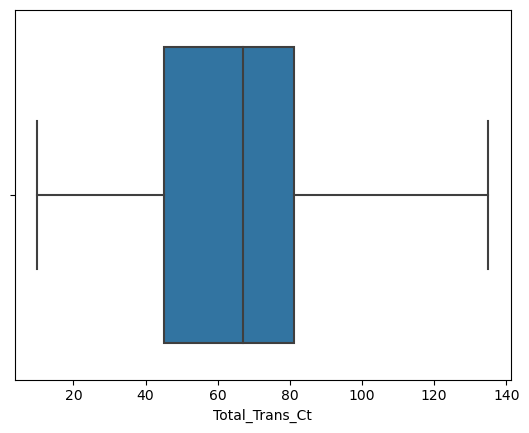

<IPython.core.display.Javascript object>

In [86]:
sns.boxplot(data=df_new, x="Total_Trans_Ct")
plt.show()

In [87]:
df_new = treat_outliers(df_new, "Total_Ct_Chng_Q4_Q1")

<IPython.core.display.Javascript object>

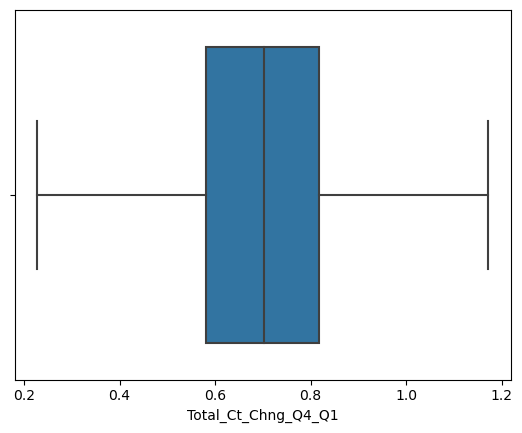

<IPython.core.display.Javascript object>

In [88]:
sns.boxplot(data=df_new, x="Total_Ct_Chng_Q4_Q1")
plt.show()

In [89]:
df_new = treat_outliers(df_new, "Avg_Utilization_Ratio")

<IPython.core.display.Javascript object>

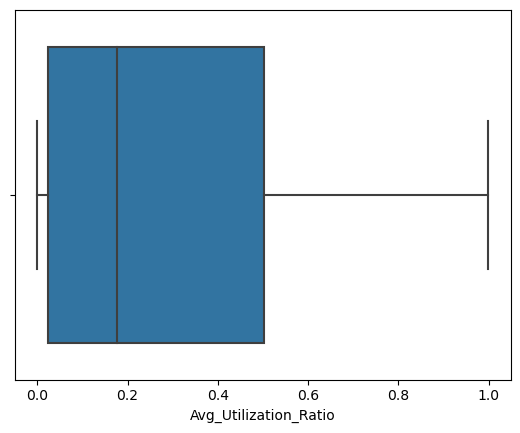

<IPython.core.display.Javascript object>

In [90]:
sns.boxplot(data=df_new, x="Avg_Utilization_Ratio")
plt.show()

## Missing value imputation




In [91]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  float64 
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  float64 
 11  Contacts_Count_12_mon     10127 non-null  float64 
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

In [92]:
missing_value_cols = ["Education_Level", "Marital_Status", "Income_Category"]

<IPython.core.display.Javascript object>

In [93]:
df_new["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [94]:
df_new["Income_Category"].replace("abc", np.nan, inplace=True)

<IPython.core.display.Javascript object>

In [95]:
df_new["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

In [96]:
df_new.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

<IPython.core.display.Javascript object>

In [97]:
df_new1 = df_new.copy()

<IPython.core.display.Javascript object>

In [98]:
imputer = SimpleImputer(strategy="most_frequent")

<IPython.core.display.Javascript object>

In [99]:
X = df_new1.drop(["Attrition_Flag"], axis=1)
y = df_new1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [100]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, random_state=1, test_size=0.20, stratify=y
)

<IPython.core.display.Javascript object>

In [101]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, random_state=1, test_size=0.25, stratify=y_temp
)

<IPython.core.display.Javascript object>

In [102]:
# Fit and transform the train data
X_train[missing_value_cols] = imputer.fit_transform(X_train[missing_value_cols])

# Transform the validation data
X_val[missing_value_cols] = imputer.transform(X_val[missing_value_cols])

# Transform the test data
X_test[missing_value_cols] = imputer.transform(X_test[missing_value_cols])

<IPython.core.display.Javascript object>

In [103]:
# Checking that no column has missing values in train, val or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

<IPython.core.display.Javascript object>

In [104]:
cols = X_train.select_dtypes(include=["object", "category"])
for c in cols.columns:
    print(f"Value conts for {c}")
    print(X_train[c].value_counts())
    print("*" * 50)

Value conts for Gender
F    3193
M    2882
Name: Gender, dtype: int64
**************************************************
Value conts for Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: Education_Level, dtype: int64
**************************************************
Value conts for Marital_Status
Married     3276
Single      2369
Divorced     430
Name: Marital_Status, dtype: int64
**************************************************
Value conts for Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: Income_Category, dtype: int64
**************************************************
Value conts for Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: Card_Category, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [105]:
cols = X_val.select_dtypes(include=["object", "category"])
for c in cols.columns:
    print(f"Value conts for {c}")
    print(X_val[c].value_counts())
    print("*" * 50)

Value conts for Gender
F    1095
M     931
Name: Gender, dtype: int64
**************************************************
Value conts for Education_Level
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: Education_Level, dtype: int64
**************************************************
Value conts for Marital_Status
Married     1100
Single       770
Divorced     156
Name: Marital_Status, dtype: int64
**************************************************
Value conts for Income_Category
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: Income_Category, dtype: int64
**************************************************
Value conts for Card_Category
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: Card_Category, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [106]:
cols = X_test.select_dtypes(include=["object", "category"])
for c in cols.columns:
    print(f"Value conts for {c}")
    print(X_test[c].value_counts())
    print("*" * 50)

Value conts for Gender
F    1070
M     956
Name: Gender, dtype: int64
**************************************************
Value conts for Education_Level
Graduate         948
High School      381
Uneducated       300
College          196
Post-Graduate    103
Doctorate         98
Name: Education_Level, dtype: int64
**************************************************
Value conts for Marital_Status
Married     1060
Single       804
Divorced     162
Name: Marital_Status, dtype: int64
**************************************************
Value conts for Income_Category
Less than $40K    933
$40K - $60K       370
$60K - $80K       292
$80K - $120K      289
$120K +           142
Name: Income_Category, dtype: int64
**************************************************
Value conts for Card_Category
Blue        1876
Silver       119
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

##### Encoding Categorical variables

In [107]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

<IPython.core.display.Javascript object>

In [108]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21.000,6,4.000,3.000,20056.000,1602,18454.000,0.466,1687.000,46,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34.000,6,2.000,0.500,2885.000,1895,990.000,0.387,1366.000,31,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36.000,5,1.000,2.000,6798.000,2517,4281.000,0.873,4327.000,79,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36.000,6,2.000,0.500,23836.250,0,22660.750,0.610,1209.000,39,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36.000,2,2.000,3.000,15034.000,1356,13678.000,0.754,7737.000,84,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


<IPython.core.display.Javascript object>

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [109]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Model Building with original data

Sample code for model building with original data 

In [110]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_val, y_val)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Logistic regression: 0.45389344262295084
Decision Tree: 1.0
Bagging: 0.985655737704918
RandomForest: 1.0
AdaBoost: 0.8370901639344263
GradientBoost: 0.8811475409836066

Validation Performance:

Logistic regression: 0.48773006134969327
Decision Tree: 1.0
Bagging: 0.9785276073619632
RandomForest: 1.0
AdaBoost: 0.8865030674846626
GradientBoost: 0.950920245398773


<IPython.core.display.Javascript object>

### Model Building with Oversampled data


In [111]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [112]:
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [113]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.8354579329280251
Decision Tree: 1.0
Bagging: 0.9964698960580506
RandomForest: 1.0
AdaBoost: 0.9672484800941361
GradientBoost: 0.9817611296332615

Validation Performance:

Logistic regression: 0.8128834355828221
Decision Tree: 0.803680981595092
Bagging: 0.8588957055214724
RandomForest: 0.843558282208589
AdaBoost: 0.8742331288343558
GradientBoost: 0.8803680981595092


<IPython.core.display.Javascript object>

### Model Building with Undersampled data

In [114]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [115]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [116]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("RandomForest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(
        y_train_un, model.predict(X_train_un)
    )  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Logistic regression: 0.7971311475409836
Decision Tree: 1.0
Bagging: 0.9938524590163934
RandomForest: 1.0
AdaBoost: 0.9477459016393442
GradientBoost: 0.9815573770491803

Validation Performance:

Logistic regression: 0.8067484662576687
Decision Tree: 0.911042944785276
Bagging: 0.9325153374233128
RandomForest: 0.9447852760736196
AdaBoost: 0.950920245398773
GradientBoost: 0.9539877300613497


<IPython.core.display.Javascript object>

### HyperparameterTuning 

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For Logistic Regression:

```
param_grid = {'C': np.arange(0.1,1.1,0.1)}

```
- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05], 
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Tuning Bagging Classifier with original data

In [117]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.9} with CV score=0.8237362637362636:


<IPython.core.display.Javascript object>

In [118]:
tuned_bg = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=0.8, max_features=0.9
)  ## model with best parameters

tuned_bg.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [119]:
# Checking model's performance on training set
bg_train = model_performance_classification_sklearn(tuned_bg, X_train, y_train)
bg_train

,Accuracy,Recall,Precision,F1
0,1.000,0.998,0.999,0.998


<IPython.core.display.Javascript object>

In [120]:
# Checking model's performance on validation set
bg_val = model_performance_classification_sklearn(tuned_bg, X_val, y_val)
bg_val

,Accuracy,Recall,Precision,F1
0,0.964,0.850,0.920,0.884


<IPython.core.display.Javascript object>

#### Tuning Bagging Classifier with oversampled data

In [121]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.9696076507148493:


<IPython.core.display.Javascript object>

In [122]:
# Creating new pipeline with best parameters
tuned_bg_ov = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=0.8, max_features=0.7
)  ## Complete the code with the best

tuned_bg_ov.fit(X_train_over, y_train_over)  ## fit the model on oversampled data

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [123]:
# Checking model's performance on training set
bg_train_ov = model_performance_classification_sklearn(tuned_bg_ov, X_train, y_train)
bg_train_ov

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,0.999


<IPython.core.display.Javascript object>

In [124]:
# Checking model's performance on validation set
bg_val_ov = model_performance_classification_sklearn(tuned_bg_ov, X_val, y_val)
bg_val_ov

,Accuracy,Recall,Precision,F1
0,0.962,0.902,0.870,0.886


<IPython.core.display.Javascript object>

#### Tuning Bagging Classifier with undersampled data

In [125]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "max_samples": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9],
    "n_estimators": [30, 50, 70],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 70, 'max_samples': 1, 'max_features': 0.8} with CV score=1.0:


<IPython.core.display.Javascript object>

In [126]:
# Creating new pipeline with best parameters
tuned_bg_un = BaggingClassifier(
    random_state=1, n_estimators=70, max_samples=1, max_features=0.8
)  ## Complete the code with the best

tuned_bg_un.fit(X_train_un, y_train_un)  ## fit the model on undersampled data

BaggingClassifier(max_features=0.8, max_samples=1, n_estimators=70,
                  random_state=1)

<IPython.core.display.Javascript object>

In [127]:
# Checking model's performance on training set
bg_train_un = model_performance_classification_sklearn(tuned_bg_un, X_train, y_train)
bg_train

,Accuracy,Recall,Precision,F1
0,1.000,0.998,0.999,0.998


<IPython.core.display.Javascript object>

In [128]:
# Checking model's performance on validation set
bg_val_un = model_performance_classification_sklearn(tuned_bg_un, X_val, y_val)
bg_val

,Accuracy,Recall,Precision,F1
0,0.964,0.850,0.920,0.884


<IPython.core.display.Javascript object>

#### Tuning RandomForest Classifier with original data

In [129]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7253741496598639:


<IPython.core.display.Javascript object>

In [130]:
# Creating new pipeline with best parameters
tuned_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=1,
    max_features="sqrt",
    max_samples=0.6,
    random_state=1,
)  ## Complete the code with the best

tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [131]:
# Checking model's performance on training set
rf_train = model_performance_classification_sklearn(tuned_rf, X_train, y_train)
rf_train

,Accuracy,Recall,Precision,F1
0,0.998,0.987,1.000,0.993


<IPython.core.display.Javascript object>

In [132]:
# Checking model's performance on validation set
rf_val = model_performance_classification_sklearn(tuned_rf, X_val, y_val)
rf_val

,Accuracy,Recall,Precision,F1
0,0.956,0.788,0.928,0.852


<IPython.core.display.Javascript object>

#### Tuning RandomForest Classifier with oversampled data

In [133]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9631368700571494:


<IPython.core.display.Javascript object>

In [134]:
# Creating new pipeline with best parameters
tuned_rf_ov = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=1,
    max_features="sqrt",
    max_samples=0.6,
    random_state=1,
)  ## Complete the code with the best

tuned_rf_ov.fit(
    X_train_over, y_train_over
)  ## Complete the code to fit the model on undersampled data

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

<IPython.core.display.Javascript object>

In [135]:
# Checking model's performance on training set
rf_train_ov = model_performance_classification_sklearn(tuned_rf_ov, X_train, y_train)
rf_train_ov

,Accuracy,Recall,Precision,F1
0,0.999,1.000,0.996,0.998


<IPython.core.display.Javascript object>

In [136]:
# Checking model's performance on validation set
rf_val_ov = model_performance_classification_sklearn(tuned_rf_ov, X_val, y_val)
rf_val_ov

,Accuracy,Recall,Precision,F1
0,0.952,0.834,0.863,0.849


<IPython.core.display.Javascript object>

#### Tuning RandomForest Classifier with undersampled data

In [137]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "n_estimators": [200, 250, 300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1), "sqrt"],
    "max_samples": np.arange(0.4, 0.7, 0.1),
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9272422815279959:


<IPython.core.display.Javascript object>

In [138]:
# Creating new pipeline with best parameters
tuned_rf_un = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=2,
    max_features="sqrt",
    max_samples=0.5,
    random_state=1,
)  ## best parameters

tuned_rf_un.fit(X_train_un, y_train_un)  ## Fit the model on undersampled data

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

In [139]:
# Checking model's performance on training set
rf_train_un = model_performance_classification_sklearn(tuned_rf_un, X_train, y_train)
rf_train_un

,Accuracy,Recall,Precision,F1
0,0.935,0.993,0.714,0.831


<IPython.core.display.Javascript object>

In [140]:
# Checking model's performance on validation set
rf_val_un = model_performance_classification_sklearn(tuned_rf_un, X_val, y_val)
rf_val_un

,Accuracy,Recall,Precision,F1
0,0.919,0.920,0.683,0.784


<IPython.core.display.Javascript object>

#### Tuning GradientBoost Classifier with original data

In [141]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = param_grid = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8452799581371011:


<IPython.core.display.Javascript object>

In [142]:
gbc_tuned = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)  ## fit the model on train data

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

<IPython.core.display.Javascript object>

In [143]:
# Checking model's performance on training set
gbc_train = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_train

,Accuracy,Recall,Precision,F1
0,0.984,0.931,0.965,0.948


<IPython.core.display.Javascript object>

In [144]:
# Checking model's performance on validation set
gbc_val = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
gbc_val

,Accuracy,Recall,Precision,F1
0,0.973,0.890,0.939,0.913


<IPython.core.display.Javascript object>

#### Tuning GradientBoosting Classifier with oversampled data

In [145]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.946267390174912:


<IPython.core.display.Javascript object>

In [146]:
gbc_tuned_ov = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_ov.fit(X_train_over, y_train_over)  ## fit the model on undersampled data

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.7, random_state=1,
                           subsample=0.5)

<IPython.core.display.Javascript object>

In [147]:
# Checking model's performance on oversamplede training set
gbc_train_ov = model_performance_classification_sklearn(
    gbc_tuned_ov, X_train_over, y_train_over
)
gbc_train_ov

,Accuracy,Recall,Precision,F1
0,0.935,0.957,0.916,0.936


<IPython.core.display.Javascript object>

In [148]:
# Checking model's performance on validation set
gbc_val_ov = model_performance_classification_sklearn(gbc_tuned_ov, X_val, y_val)
gbc_val_ov

,Accuracy,Recall,Precision,F1
0,0.912,0.908,0.667,0.769


<IPython.core.display.Javascript object>

#### Tuning GradientBoostingClassifier Classifier with undersampled data

In [149]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = param_grid = {
    "init": [
        AdaBoostClassifier(random_state=1),
        DecisionTreeClassifier(random_state=1),
    ],
    "n_estimators": np.arange(75, 150, 25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample": [0.5, 0.7, 1],
    "max_features": [0.5, 0.7, 1],
}

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=10,
    n_jobs=-1,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.95287284144427:


<IPython.core.display.Javascript object>

In [150]:
gbc_tuned_un = randomized_cv.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_un.fit(X_train_un, y_train_un)  ## fit the model on undersampled data

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

<IPython.core.display.Javascript object>

In [151]:
# Checking model's performance on undersampled data
gbc_train_un = model_performance_classification_sklearn(
    gbc_tuned_un, X_train_un, y_train_un
)
gbc_train_un

,Accuracy,Recall,Precision,F1
0,0.997,0.999,0.996,0.997


<IPython.core.display.Javascript object>

In [152]:
# Checking model's performance on validation set
gbc_val_un = model_performance_classification_sklearn(gbc_tuned_un, X_val, y_val)
gbc_val_un

,Accuracy,Recall,Precision,F1
0,0.953,0.972,0.785,0.868


<IPython.core.display.Javascript object>

## Model Comparison and Final Model Selection

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbc_train_ov.T,
        gbc_train_un.T,
        gbc_train.T,
        bg_train_ov.T,
        bg_train_un.T,
        bg_train.T,
        rf_train_ov.T,
        rf_train_un.T,
        rf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "Bagging trained with Oversampled data",
    "Bagging trained with Undersampled data",
    "Bagging trained with Original data",
    "RandomForest trained with Oversampled data",
    "RandomForest trained with Undersampled data",
    "RandomForest trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,Bagging trained with Oversampled data,Bagging trained with Undersampled data,Bagging trained with Original data,RandomForest trained with Oversampled data,RandomForest trained with Undersampled data,RandomForest trained with Original data
Accuracy,0.935,0.997,0.984,1.000,0.161,1.000,0.999,0.935,0.998
Recall,0.957,0.999,0.931,0.999,1.000,0.998,1.000,0.993,0.987
Precision,0.916,0.996,0.965,1.000,0.161,0.999,0.996,0.714,1.000
F1,0.936,0.997,0.948,0.999,0.277,0.998,0.998,0.831,0.993


<IPython.core.display.Javascript object>

In [154]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbc_val_ov.T,
        gbc_val_un.T,
        gbc_val.T,
        bg_val_ov.T,
        bg_val_un.T,
        bg_val.T,
        rf_val_ov.T,
        rf_val_un.T,
        rf_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient boosting trained with Oversampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "Bagging trained with Oversampled data",
    "Bagging trained with Undersampled data",
    "Bagging trained with Original data",
    "RandomForest trained with Oversampled data",
    "RandomForest trained with Undersampled data",
    "RandomForest trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting trained with Oversampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,Bagging trained with Oversampled data,Bagging trained with Undersampled data,Bagging trained with Original data,RandomForest trained with Oversampled data,RandomForest trained with Undersampled data,RandomForest trained with Original data
Accuracy,0.912,0.953,0.973,0.962,0.161,0.964,0.952,0.919,0.956
Recall,0.908,0.972,0.890,0.902,1.000,0.850,0.834,0.920,0.788
Precision,0.667,0.785,0.939,0.870,0.161,0.920,0.863,0.683,0.928
F1,0.769,0.868,0.913,0.886,0.277,0.884,0.849,0.784,0.852


<IPython.core.display.Javascript object>

### Test set final performance

In [155]:
gbc_test_ov = model_performance_classification_sklearn(gbc_tuned_ov, X_test, y_test)
gbc_val_ov

,Accuracy,Recall,Precision,F1
0,0.912,0.908,0.667,0.769


<IPython.core.display.Javascript object>

### Feature Importance

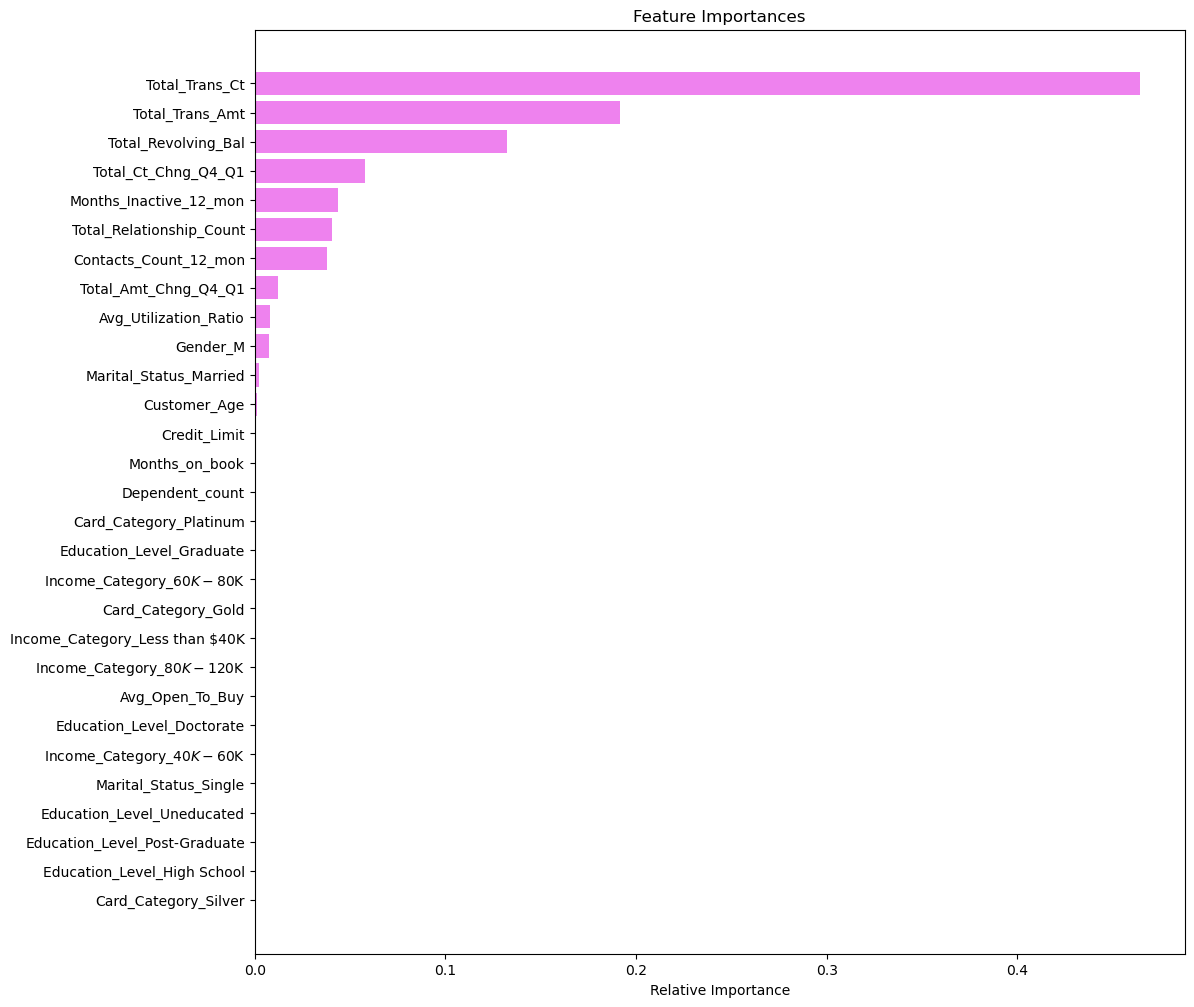

<IPython.core.display.Javascript object>

In [156]:
feature_names = X_train_over.columns
importances = gbc_tuned_ov.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Ct and Total_Trans_Amt are most important features according to tuned Gradient Boost Classifier on oversampled data

## Pipelines to build the final model


In [157]:
# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



<IPython.core.display.Javascript object>

In [158]:
# Separating target variable and other variables
X = churn.drop(columns="Attrition_Flag")  ##  drop target variable
Y = churn["Attrition_Flag"]  ##  store target variable

<IPython.core.display.Javascript object>

In [159]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
X.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [160]:
X["Income_Category"].replace("abc", np.nan, inplace=True)  ##  impute the missing values

<IPython.core.display.Javascript object>

In [161]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

<IPython.core.display.Javascript object>

In [162]:
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [163]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 29) (3039, 29)


<IPython.core.display.Javascript object>

In [164]:
# Creating new pipeline with best parameters
model = Pipeline([('scaler', StandardScaler()),('clf', GradientBoostingClassifier())]) ## Creating pipeline for the best model


<IPython.core.display.Javascript object>

In [165]:
model.fit(X_train, y_train)  ##  fit the Model obtained from above step

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', GradientBoostingClassifier())])

<IPython.core.display.Javascript object>

In [166]:
model.score(X_test, y_test)

0.9647910496873972

<IPython.core.display.Javascript object>

# Business Insights and Conclusions

#### Business Insights

- Total Transaction Amount 

    . Highly Right skewed with many outliers

    . Average transaction amount is 4404, minimum is 510 and maximum is 18484, 75% the customers have less than 4741

    . Level of Education of customers

    . Most of the customers are Graduates which is 30.9% and customers who are high schoolers are next highest which is 19.9%
    
    . Percentage of customers who are Doctorates and postgraduates are less relatively which is 4.5% and 5.1% respectively


- Level of Income of Customers

    . Most of the customers have income less than $40K which is 35.2%
    
    . Least percentage of customers have income more than 120K which is 7.2$
    
    . Most of the attrited customers have salary less than 40K 

- Change in transaction amount between Q4 and Q1 (`Total_Amt_Chng_Q4_Q1`) with respect to Attrition_Flag

    . Distribution of data is highly right skewed with many outliers
    
    . Change in transaction amount between Q4 and Q1 for Existing customers is highly right skewed with many outliers
    
    . Change in transaction amount between Q4 and Q1 for Existing customers is normal when compared to that of existing customers but with some outliers


- Months_Inactive_12_mon 


    . Most of the attrited customers are inactive for 3 months (826 customers). 
    
      That means there are chances for customers who are inactive for 3 or more months to close their credit cards. 3020 existing customers are inactive for 3 months and bank needs to take measures by providing extra offers to these customers in order to retain them
        
    . Less number of attrited customers are inactive for 6 months (19 customers)

- Attributes that have strong correlation

    . Total_Trans_Amt and Total_Trans_Ct 0.8

    . Customer_Age and Months_on_book 0.8

    . Total_Revolving_Bal and Avg_Utilization_Ratio 0.6

    . Negative correlation between Avg_Open_To_Buy and Avg_Utilization_Ratio which is -0.5

    . Negative correlation between Credit_Limit and Avg_Utilization_Ratio which is -0.5

#### Conclusions

Blue category has more no.of customers and at the same time attrited customers count is more for this category. 

Attrited Customers with income less than 40K are more 

Most of the attrited customers are Graduates and high schoolers

Most of the Attrited Customers are inactive for 3 or more months. That means there are high chances for existing customers who are inactive for 3 or more months to become attrited. 

Bank should focus more on customers who comes under above categories and provide attracting offers to customers in order to retain them